<center> <img src='https://www.cm-santarem.pt/images/santarem/covid19/ARECOVID.jpg' width="950" height="250"> </center>

# Deep Learning Project <img align='right' width='120' height='130' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>
<p>
<p>    
    

## <font color='SeaGreen'>__Model Tests__</font><br>

>> __João Malho, nº20220696__ , m20220696@novaims.unl.pt<p>
    
***
    
## <center> __Lung Virus Detection__ </center>

***
## 📋 Index <a class="anchor"><a id='index'></a>
> ## [<font color='MediumPurple'> __1. Pre Processing__</font>](#one)
>> ### [<font color='White'> __1.1 Libraries__</font>](#oneone)
>> ### [<font color='White'> __1.2 Data Processing__</font>](#onetwo)
> ## [<font color='MediumPurple'> __2. The Base Model__ </font>](#two)
>> ### [<font color='White'> __2.1 Model Architecture explained__</font>](#twoone)
> ## [<font color='MediumPurple'> __3. Parameters impact__ </font>](#three)
>> ### [<font color='White'> __3.1 Data Augmentation__</font>](#threeone)
>>> #### [<font color='White'> __3.1.1 With Data Augmentation__</font>](#threeoneone)
>>> #### [<font color='White'> __3.1.2 Without Data Augmentation__</font>](#threeonetwo)
>> ### [<font color='White'> __3.2 Batch Normalization__</font>](#threetwo)
>>> #### [<font color='White'> __3.2.1 With Batch Normalization__</font>](#threetwoone)
>>> #### [<font color='White'> __3.2.2 Without Batch Normalization__</font>](#threetwotwo)
>> ### [<font color='White'> __3.3 Number of Convolutional Filters__</font>](#threethree)
>> ### [<font color='White'> __3.4 Activation Function__</font>](#threefour)
>> ### [<font color='White'> __3.5 The Kernel Size__</font>](#threefive)
>> ### [<font color='white'> __3.6 The Max Pooling Size__</font>](#threesix)
>> ### [<font color='white'> __3.7 Optimizer__</font>](#threeseven)
>> ### [<font color='white'> __3.8 Learning Rates__</font>](#threeeight)
>> ### [<font color='white'> __3.9 Loss Function__</font>](#threenine)
>> ### [<font color='white'> __3.10 Retest Batch Normalization__</font>](#threeten)
> ## [<font color='white'> __4 Final Model Train__</font>](#four)
***
***

***
## <font color='white'> __1. Pre Processing__ </font> <a class="anchor" id="one"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

### <font color='white'> __1.1 Libraries__ </font> <a class="anchor" id="oneone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

In [2]:
import os
import pydot
import graphviz
import warnings
import itertools
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
import plotly.graph_objects as go

from keras import layers, initializers
from keras.models import Sequential

import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

from tensorflow.keras.losses import Poisson, KLDivergence, SparseCategoricalCrossentropy

warnings.filterwarnings("ignore")


### <font color='white'> __1.2 Data Processing__ </font> <a class="anchor" id="onetwo"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

In [3]:
# Image size
image_size = (224,224)

# Dataset folder
folder_path = os.path.join(os.getcwd(), r'Covid19-dataset')

train_path = folder_path + r'/train'
test_path = folder_path + r'/test'

# x_train and y_train alreayd have size image adjustment 
x_train = []
for folder in os.listdir(train_path):
    sub_path = train_path + '/' + folder
    for image in os.listdir(sub_path):
        img_path = sub_path + '/' + image
        img = Image.open(img_path)              # Open Image 
        img = img.resize(image_size)            # Resize Image as explained above
        x_train.append(np.array(img))
        
x_test = []
for folder in os.listdir(test_path):
    sub_test = test_path + '/' + folder
    for image in os.listdir(sub_test):
        img_test = sub_test + '/' + image
        imgtest = Image.open(img_test)
        imgtest = imgtest.resize(image_size)
        x_test.append(np.array(imgtest))

***

## <font color='white'> __2. The base model__ </font> <a class="anchor" id="two"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

### <font color='white'> __2.1 Model Architecture explained__ </font> <a class="anchor" id="twoone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)


`cnn = Sequential([`
* __Sequential__ is a class in Keras that allow the creation of a linear group of layers in a neural network as the following ones

`layers.Input((224,224,3)),`
* __Layer Input__ is the first piece of the model is used to specify the shape of the input data that will be passes to the model.

`layers.Conv2D(filters=n_filt_1, kernel_size=kernel_size, kernel_initializer=initializers.GlorotNormal(seed=seed)),`
* __Layer Conv2D__ is a 2D convolutional layer that applies convolution operation on 2D input data.
> __Filters__ - number of filters applyed.

> __kernel_size__ - height and width of the 2D conv. window.

> __kernel_initializer__ - specifies how the weights of the kernel will be initialized, with "GlorotNormal" uses a truncated to normal distribution.

`layers.BatchNormalization(),`
* __BatchNormalization__ normalizes the input values to a layer, so that the mean of the activations is close to zero and the standard deviation is close to one, this helps in speeding up the training process and preventing overfitting.

`layers.Activation(act_1),`
* __Activation(act_1)__ act1 will be the activation function, as mentionated before will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations.

`layers.MaxPooling2D(pool_size=pool_size),`
* __MaxPooling2D__ performs a downsampling operation on the input data, divides the input tensor into non-overlapping rectangular subregions (pooling regions), and for each region, it outputs the maximum value. This reduces the size of the tensor while retaining the most salient features

`layers.Conv2D(filters=n_filt_2, kernel_size=kernel_size, kernel_initializer=initializers.GlorotNormal(seed=seed)),`
                    
`layers.BatchNormalization(),`

`layers.Activation(act_1),`

`layers.MaxPooling2D(pool_size=pool_size),`
                    
`layers.Flatten(),`
* __Flatten()__ it transforms a tensor of shape into a tensor of a shape that can then be fed into a fully connected neural network like Softmax.
                    
`layers.Dense(units=3, activation=act_2, kernel_initializer=initializers.GlorotNormal(seed=seed))], name=model_name)`
* __Dense__ it is used to connect every neuron in one layer to every neuron in the next layer, the output layer will have as many neurons as there are classes.

   
`cnn.compile(optimizer = optim, loss = loss_lambda, metrics = [metric])`
* __Compile__ will complite the 3 necessary arguments for model train and control during train
> __optimizer__ - optimization algorithm to use during training

> __loss__ - loss function 




`cnn.fit(train, epochs=epoch, validation_data=val, verbose=results)`
* __Fit__ is a function for train the model on the given dataset
> __epochs__ - Number of times the entire training dataset will be passed through the neural network during training. One epoch is a single iteration over the entire training dataset.

> __validation_data__ - Used to specify the validation dataset, which is a separate set used to evaluate the performance of the model during training.

> __verbose__ - Controls the amount of information printed to the console during training


---

__Types of models:__
* A Convolutional Neural Network (CNN, or ConvNet) are a special kind of multi-layer neural networks, designed to recognize visual patterns directly from pixel images with minimal preprocessing

* VGGNet consists of 16 convolutional layers and is very appealing because of its very uniform architecture. Similar to AlexNet, only 3x3 convolutions, but lots of filters.


* Below function create a base CNN model with default paramenters, further we will be able to change all necessary paramenters in orde rto test the accuracy on the paramenter impact. 

In [4]:

# functions for test environment
def plot_accuracy_loss(history):
    '''
    Plots test and validation loss and accuracy
    '''
    
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy 
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = 'acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label = 'val_acc')
    plt.title('train_acc vs val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = 'loss')
    plt.plot(history.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')

    plt.legend()
    plt.show()

def display_model(model):
    '''
    Plots model architecture
    '''
    # Display model architecture
    display(utils.plot_model(model, show_layer_names=True, show_shapes=True))

def base_cnn(act_1='relu',
            n_filt_1=6,
            n_filt_2=16,
            act_2='softmax',
            kernel_size=(3,3),
            pool_size=(2,2),
            batch_norm=0,
            model_name = '', 
            optim='adam',
            loss_lambda='sparse_categorical_crossentropy',
            metric='accuracy',
            epoch=5,
            schema=0,
            scores=0,
            results=1,
            data_augmentation=0,
            seed=0): 
    '''
    Base CNN model to test different parameters:

        act_1 - (str) - Activation Function for Hidden Layers
        act_2 - (str) - Activation Function for FC Layers (classificator)
        n_filt_1 - (int) - First convolution number of filters
        n_filt_2 - (int) - Second convolution number of filters
        kernel_size - (tuple of 2 int) - Size of grid for convolution
        model_name - (str) - Model Name
        batch_norm - (binary) = 1 - for yes ; 0 - for no 
        optim - (str) Optimization Algorithm [SGD, RMSprop, Adam, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam, Ftrl]
        loss_lambda - (str) Probabilistic Loss Function [BinaryCrossentropy class, CategoricalCrossentropy class, SparseCategoricalCrossentropy class, Poisson class, binary_crossentropy function, categorical_crossentropy function, sparse_categorical_crossentropy function, poisson function, KLDivergence class, kl_divergence function]
        metric - (str) Model benchmarker 
        epoch - (int) Number of timer the model will pass all the training data
        seed - (int) - seed for reproducibility
    
    The model has the following architecture: 
            1 - Input Layer
            2 - Convulutional Layer
            3 - Batch Normalization (optional)
            4 - Activation Function + MaxPooling
            4 - Convulutional Layer
            3 - Batch Normalization (optional)
            4 - Activation Function + MaxPooling
            5 - Fully Connected Layer
            6 - Output Layer    
    '''
    if data_augmentation == 1:
        
        # Data Augmentation
        train_gen = ImageDataGenerator(
            
                                    # image rotation
                                    rotation_range=45,
            
                                    # image shifters
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2,
                                    channel_shift_range=100,

                                    # image zoomers & distorters
                                    shear_range=0.5,       
                                    zoom_range=0.5,   
                            
                                    # image flippers
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    
                                    # fills missing pixels  
                                    # nearest fills the missing with the value
                                    # of nearest pixel
                                    fill_mode='nearest',
            
                                    # rescales to [0,1]
                                    rescale = 1./255, 
                                    
                                    # getting validation split
                                    validation_split=.2
                                    )
        # Rescaling test data
        test_gen = ImageDataGenerator(rescale = 1./255)
        val_gen = ImageDataGenerator(rescale = 1./255, validation_split=.2)

        train = train_gen.flow_from_directory(
                            train_path,
                            subset = 'training',
                            batch_size=32, # Default value
                            target_size=image_size,
            
                            # Used for multi-class classification problems where 
                            # there are more than two classes. The labels are 
                            # returned as a 1D numpy array of integer labels
                            class_mode = 'sparse' 
        )

        val = val_gen.flow_from_directory(
                            train_path,
                            subset = 'validation',
                            batch_size=32, 
                            target_size=image_size,
                            class_mode = 'sparse'
        )

        test = test_gen.flow_from_directory(
                            test_path,
                            batch_size=32,
                            target_size=image_size,
                            class_mode = 'sparse'
        )

        
    elif data_augmentation == 0:
        
        # Data Augmentation
        train_gen = ImageDataGenerator(            
                                    # rescales to [0,1]
                                    rescale = 1./255, 
                                    
                                    # getting validation split
                                    validation_split=.2
                                    )
        # Rescaling test data
        test_gen = ImageDataGenerator(rescale = 1./255)

        train = train_gen.flow_from_directory(
                            train_path,
                            subset = 'training',
                            batch_size=32, # Default value
                            target_size=image_size,
            
                            # Used for multi-class classification problems where 
                            # there are more than two classes. The labels are 
                            # returned as a 1D numpy array of integer labels
                            class_mode = 'sparse' 
        )

        val = train_gen.flow_from_directory(
                            train_path,
                            subset = 'validation',
                            batch_size=32, 
                            target_size=image_size,
                            class_mode = 'sparse'
        )

        test = test_gen.flow_from_directory(
                            test_path,
                            batch_size=32,
                            target_size=image_size,
                            class_mode = 'sparse'
        )

        
    if batch_norm == 1: # model with batch normalization
            cnn = Sequential([
                        layers.Input((224,224,3)),

                        # Glorot normal prevents "saturated" or "dead" neurons by initializing weight w from a normal distribution the weights 
                        # with random numbers from a normal distribution with a mean of 0, and a standard deviation equal to 2, divided by the number of inputs,
                        # plus the number of outputs for the transformation
                        layers.Conv2D(filters=n_filt_1, kernel_size=kernel_size, kernel_initializer=initializers.GlorotNormal(seed=seed)),
                        
                        layers.BatchNormalization(),
        
                        layers.Activation(act_1),

                        layers.MaxPooling2D(pool_size=pool_size),

                        layers.Conv2D(filters=n_filt_2, 
                                    kernel_size=kernel_size,
                                    kernel_initializer=initializers.GlorotNormal(seed=seed)),
                        
                        layers.BatchNormalization(),

                        layers.Activation(act_1),

                        layers.MaxPooling2D(pool_size=pool_size),
                        
                        layers.Flatten(), 
                        
                        layers.Dense(units=3, 
                                    activation=act_2,
                                    kernel_initializer=initializers.GlorotNormal(seed=seed))],
                        name=model_name)

    elif batch_norm == 0: # model without batch normalization
            cnn = Sequential([
                        layers.Input((224,224,3)),
                        
                        layers.Conv2D(filters=n_filt_1, kernel_size=kernel_size, kernel_initializer=initializers.GlorotNormal(seed=seed)),
                        
                        layers.Activation(act_1),
                        
                        layers.MaxPooling2D(pool_size=pool_size),

                        layers.Conv2D(filters=n_filt_2, 
                                    kernel_size=kernel_size,
                                    kernel_initializer=initializers.GlorotNormal(seed=seed)),
                            
                        layers.Activation(act_1),
                        
                        layers.MaxPooling2D(pool_size=pool_size),
                        
                        layers.Flatten(), 

                        layers.Dense(units=3, activation=act_2,
                                        kernel_initializer=initializers.GlorotNormal(seed=seed))],
                        name=model_name)

    # model compiler    
    cnn.compile(
            optimizer = optim,
            loss = loss_lambda,
            metrics = [metric]
            )
    if schema == 1 :
        # show architecture
        display_model(cnn)
        print('\n\nTraining model:\n')

    if results == 1 :
        history = cnn.fit(train, epochs=epoch, validation_data=val, verbose=results)
        print('\n\nTest Results:')
    # evaluate the model on the test data
        cnn.evaluate(test)
        
    else:
        history = cnn.fit(train, epochs=epoch, validation_data=val, verbose=results)

    if scores == 1 :
        print('\n\n')
        plot_accuracy_loss(history)
    
    return cnn


***
## <font color='white'> __3. Parameters impact__ </font> <a class="anchor" id="three"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

3.1. Data Augmentation

3.2. Batch Normalization

3.3. Filter number for the Convolutional Layer

3.4. Activation Function

3.5. The Kernel Size

3.6. The Pooling Size, whether it is 2x2 or 3x3

### <font color='white'> __3.1 Data Augmentation__ </font> <a class="anchor" id="threeone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

* Image data augmentation is a technique that creates new images from existing ones. To do that, you make some small changes to them, such as adjusting the brightness of the image, or rotating the image, or shifting the subject in the image horizontally or vertically. Image augmentation techniques allow you to artificially increase the size of your training set


#### <font color='white'> __3.1.1 With Data Augmentation__ </font> <a class="anchor" id="threeoneone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


With data augmentation:
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
9/9 [==============================] - 17s 2s/step - loss: 23.5598 - accuracy: 0.4157 - val_loss: 6.2027 - val_accuracy: 0.3333
Epoch 2/10
9/9 [==============================] - 17s 2s/step - loss: 13.4259 - accuracy: 0.4382 - val_loss: 1.1908 - val_accuracy: 0.4697
Epoch 3/10
9/9 [==============================] - 16s 2s/step - loss: 15.3801 - accuracy: 0.4719 - val_loss: 6.3482 - val_accuracy: 0.3636
Epoch 4/10
9/9 [==============================] - 18s 2s/step - loss: 11.8019 - accuracy: 0.4607 - val_loss: 11.4222 - val_accuracy: 0.3333
Epoch 5/10
9/9 [==============================] - 17s 2s/step - loss: 7.4050 - accuracy: 0.4794 - val_loss: 21.2675 - val_accuracy: 0.3333
Epoch 6/10
9/9 [==============================] - 16s 2s/step - loss: 7.1884 - accuracy: 0.4981 - val_loss: 16.7470 - val_accuracy: 0.3333
Epoch 7/10
9/9 [==============================] - 16s 2s/step - loss: 6.2510 - accuracy: 0.5393 - val_loss: 19.3481 - val_accuracy: 0.3333
Epoch 8

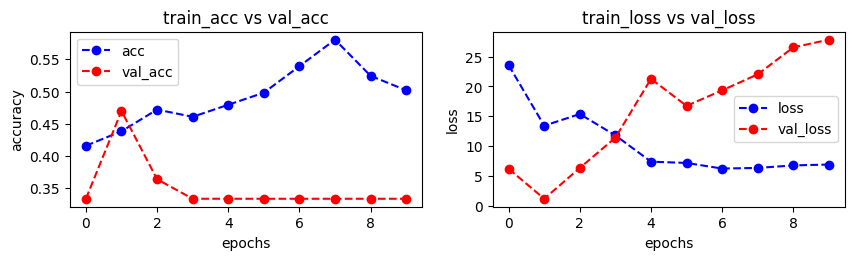

In [28]:
#model_1 = base_cnn(schema=1, scores=1)
Base_CNN_Model = base_cnn(act_1='relu',
                    n_filt_1=32,
                    n_filt_2=64,
                    act_2='softmax',
                    kernel_size=(3,3),
                    pool_size=(2,2),
                    batch_norm=1,
                    model_name = 'Base_CNN_Model', 
                    optim='adam',
                    loss_lambda='sparse_categorical_crossentropy',
                    metric='accuracy',
                    epoch=10,
                    schema=1,       # Show the model architecture
                    scores=1,       # Show the model plot of accuracy loss
                    results=1,      # Show evaluate on Test set
                    data_augmentation=1,
                    seed=0)

#### <font color='white'> __3.1.2 Without Data Augmentation__ </font> <a class="anchor" id="threeonetwo"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Without data augmentation:
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
9/9 [==============================] - 16s 2s/step - loss: 53.6875 - accuracy: 0.3745 - val_loss: 13.9086 - val_accuracy: 0.3333
Epoch 2/10
9/9 [==============================] - 14s 2s/step - loss: 14.3938 - accuracy: 0.6554 - val_loss: 18.6401 - val_accuracy: 0.3333
Epoch 3/10
9/9 [==============================] - 14s 2s/step - loss: 7.9929 - accuracy: 0.7678 - val_loss: 7.5394 - val_accuracy: 0.5909
Epoch 4/10
9/9 [==============================] - 14s 2s/step - loss: 5.0721 - accuracy: 0.8390 - val_loss: 6.4703 - val_accuracy: 0.4697
Epoch 5/10
9/9 [==============================] - 14s 2s/step - loss: 2.1723 - accuracy: 0.8989 - val_loss: 20.1751 - val_accuracy: 0.3182
Epoch 6/10
9/9 [==============================] - 14s 2s/step - loss: 1.1117 - accuracy: 0.9139 - val_loss: 30.1856 - val_accuracy: 0.3333
Epoch 7/10
9/9 [==============================] - 14s 2s/step - loss: 0.9469 - accuracy: 0.9139 - val_loss: 60.3295 - val_accuracy: 0.3333
Epoch 8/

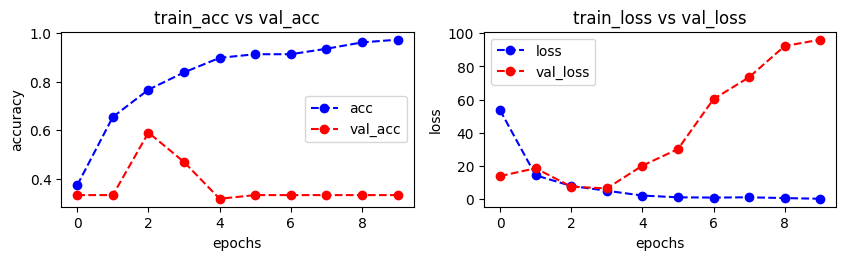

In [30]:
#model_1 = base_cnn(schema=1, scores=1)
Base_CNN_Model = base_cnn(act_1='relu',
                    n_filt_1=32,
                    n_filt_2=64,
                    act_2='softmax',
                    kernel_size=(3,3),
                    pool_size=(2,2),
                    batch_norm=1,
                    model_name = 'Base_CNN_Model', 
                    optim='adam',
                    loss_lambda='sparse_categorical_crossentropy',
                    metric='accuracy',
                    epoch=10,
                    schema=1,       # Show the model architecture
                    scores=1,       # Show the model plot of accuracy loss
                    results=1,      # Show evaluate on Test set
                    data_augmentation=0,
                    seed=0)

__Conclusion__

* Can be noted in this specific problem, that data augmentation beside rescaling of the images e not performing decreasing the accuracy of the model.

> __With Augmentarion:__

* Accuracy on Train: 0.5019 

* Accuracy on Validation: 0.3333

* Accuracy on Test: 0.3939

> __Without Augmentarion:__

* Accuracy on Train: 0.9738

* Accuracy on Validation: 0.3333

* Accuracy on Test: 0.3939


Will be keeped the cretiria of not include data augmentation for further analyses and tests
This can be overfitting yet

***

### <font color='white'> __3.2 Batch Normalization__ </font> <a class="anchor" id="threetwo"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

* Method used to make training of artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.

* It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch. This normalization step is applied right before (or right after) the nonlinear function.


#### <font color='white'> __3.2.1 With Batch Normalization__ </font> <a class="anchor" id="threetwoone"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Without data augmentation:
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
9/9 [==============================] - 16s 2s/step - loss: 23.9540 - accuracy: 0.4869 - val_loss: 7.1248 - val_accuracy: 0.3333
Epoch 2/10
9/9 [==============================] - 14s 2s/step - loss: 5.9117 - accuracy: 0.8090 - val_loss: 5.5437 - val_accuracy: 0.3485
Epoch 3/10
9/9 [==============================] - 14s 2s/step - loss: 4.3770 - accuracy: 0.8464 - val_loss: 11.1695 - val_accuracy: 0.3636
Epoch 4/10
9/9 [==============================] - 14s 2s/step - loss: 2.2768 - accuracy: 0.9101 - val_loss: 5.5606 - val_accuracy: 0.3485
Epoch 5/10
9/9 [==============================] - 15s 2s/step - loss: 0.8367 - accuracy: 0.9288 - val_loss: 12.3017 - val_accuracy: 0.3030
Epoch 6/10
9/9 [==============================] - 14s 2s/step - loss: 0.3583 - accuracy: 0.9625 - val_loss: 18.6029 - val_accuracy: 0.3182
Epoch 7/10
9/9 [==============================] - 14s 2s/step - loss: 0.3267 - accuracy: 0.9700 - val_loss: 38.6464 - val_accuracy: 0.3333
Epoch 8/10

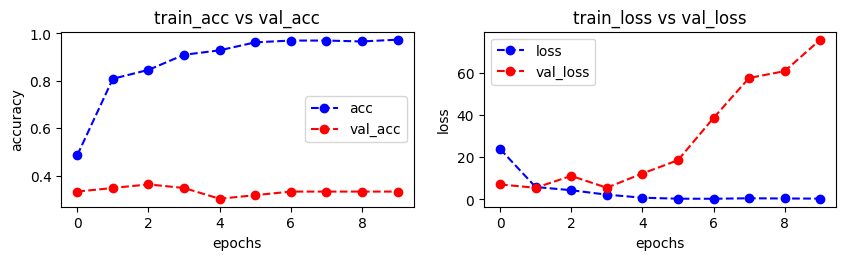

In [32]:
#model_1 = base_cnn(schema=1, scores=1)
Base_CNN_Model = base_cnn(act_1='relu',
                    n_filt_1=32,
                    n_filt_2=64,
                    act_2='softmax',
                    kernel_size=(3,3),
                    pool_size=(2,2),
                    batch_norm=1,
                    model_name = 'Base_CNN_Model', 
                    optim='adam',
                    loss_lambda='sparse_categorical_crossentropy',
                    metric='accuracy',
                    epoch=10,
                    schema=1,       
                    scores=1,       
                    results=1,      
                    data_augmentation=0, # Excluded by previous tests
                    seed=0)

#### <font color='white'> __3.2.2 Without Batch Normalization__ </font> <a class="anchor" id="threetwotwo"></a>


[<font color='mediumpurple'>Back to Index </font>](#index)

Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Without data augmentation:
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
9/9 [==============================] - 12s 1s/step - loss: 3.1788 - accuracy: 0.4869 - val_loss: 0.7063 - val_accuracy: 0.7879
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 0.7738 - accuracy: 0.6180 - val_loss: 0.7336 - val_accuracy: 0.8333
Epoch 3/10
9/9 [==============================] - 11s 1s/step - loss: 0.5370 - accuracy: 0.8427 - val_loss: 0.3913 - val_accuracy: 0.9242
Epoch 4/10
9/9 [==============================] - 11s 1s/step - loss: 0.2912 - accuracy: 0.9026 - val_loss: 0.2721 - val_accuracy: 0.9242
Epoch 5/10
9/9 [==============================] - 11s 1s/step - loss: 0.1621 - accuracy: 0.9363 - val_loss: 0.4273 - val_accuracy: 0.8788
Epoch 6/10
9/9 [==============================] - 11s 1s/step - loss: 0.1131 - accuracy: 0.9588 - val_loss: 0.2624 - val_accuracy: 0.9394
Epoch 7/10
9/9 [==============================] - 12s 1s/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.3073 - val_accuracy: 0.8788
Epoch 8/10
9/9 

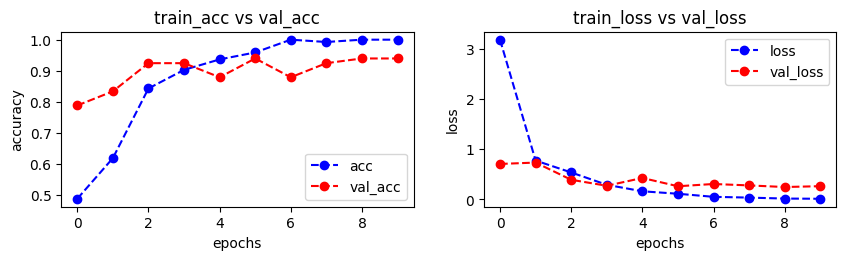

In [33]:
#model_1 = base_cnn(schema=1, scores=1)
Base_CNN_Model = base_cnn(act_1='relu',
                    n_filt_1=32,
                    n_filt_2=64,
                    act_2='softmax',
                    kernel_size=(3,3),
                    pool_size=(2,2),
                    batch_norm=0,
                    model_name = 'Base_CNN_Model', 
                    optim='adam',
                    loss_lambda='sparse_categorical_crossentropy',
                    metric='accuracy',
                    epoch=10,
                    schema=1,       
                    scores=1,       
                    results=1,      
                    data_augmentation=0, # Excluded by previous tests
                    seed=0)

__Conclusion__

* Can be noted in this specific problem, that data batch normalization is not good for this case, by feedback of several data scientists this is always a good implemenation, avoid overfitting and normalize the data for the next layers.

Previous setting:
* Without Augmentarion


> __With Batch Normalization:__

* Accuracy on Train: 0.9738 

* Accuracy on Validation: 0.3333

* Accuracy on Test: 0.3939

> __Without Batch Normalization:__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9394

* Accuracy on Test: 0.8939


Will be keeped the cretiria of not include batch normalization for further analyses and tests


***
### <font color='white'> __3.3 Number of Convolutional Filters__ </font> <a class="anchor" id="threethree"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

*_Number of ephocs was reducte from 10 to 5 in order to get less resources, otherwise will keep the double of the time._

*_It is common to use more filters in the initial convolutional layers of a deep learning model to extract a diverse range of low-level features from the input data. As the input data progresses through the network, the number of filters in each layer may decrease, allowing the model to extract higher-level features that are more abstract and specific to the task at hand._

Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 8s 899ms/step - loss: 1.0679 - accuracy: 0.5019 - val_loss: 0.8284 - val_accuracy: 0.7576
Epoch 2/5
9/9 [==============================] - 7s 799ms/step - loss: 0.7676 - accuracy: 0.6966 - val_loss: 0.6939 - val_accuracy: 0.6970
Epoch 3/5
9/9 [==============================] - 7s 802ms/step - loss: 0.5510 - accuracy: 0.7865 - val_loss: 0.3811 - val_accuracy: 0.9091
Epoch 4/5
9/9 [==============================] - 7s 830ms/step - loss: 0.4295 - accuracy: 0.8240 - val_loss: 0.4864 - val_accuracy: 0.8030
Epoch 5/5
9/9 [==============================] - 7s 814ms/step - loss: 0.3538 - accuracy: 0.8764 - val_loss: 0.2947 - val_accuracy: 0.9394


Test Results:
3/3 [==============================] - 1s 123ms/step - loss: 0.3890 - accuracy: 0.8485





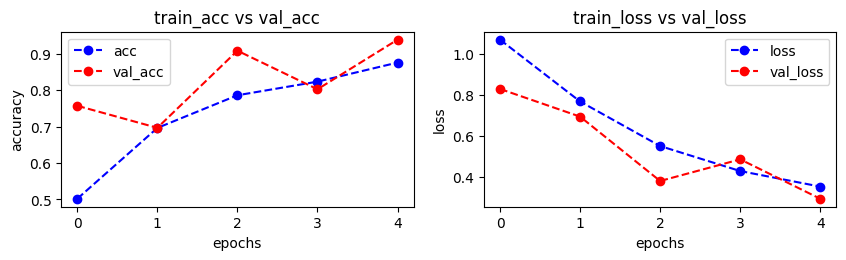

Number of 1º conv2D Filters: 6
Number of 2º conv2D Filters: 6
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 9s 932ms/step - loss: 1.4551 - accuracy: 0.4494 - val_loss: 1.1507 - val_accuracy: 0.4394
Epoch 2/5
9/9 [==============================] - 8s 843ms/step - loss: 0.8260 - accuracy: 0.6367 - val_loss: 0.6483 - val_accuracy: 0.7576
Epoch 3/5
9/9 [==============================] - 7s 875ms/step - loss: 0.5511 - accuracy: 0.8390 - val_loss: 0.5555 - val_accuracy: 0.8030
Epoch 4/5
9/9 [==============================] - 7s 825ms/step - loss: 0.3956 - accuracy: 0.8689 - val_loss: 0.3424 - val_accuracy: 0.8939
Epoch 5/5
9/9 [==============================] - 7s 847ms/step - loss: 0.2999 - accuracy: 0.9139 - val_loss: 0.3183 - val_accuracy: 0.8788


Test Results:
3/3 [==============================] - 1s 122ms/step - loss: 0.3820 - accuracy: 0.7879





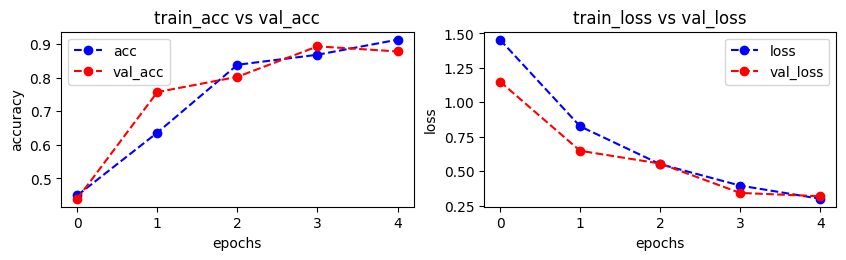

Number of 1º conv2D Filters: 6
Number of 2º conv2D Filters: 16
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 9s 894ms/step - loss: 3.7575 - accuracy: 0.3745 - val_loss: 1.5280 - val_accuracy: 0.5000
Epoch 2/5
9/9 [==============================] - 8s 884ms/step - loss: 1.1771 - accuracy: 0.5019 - val_loss: 0.5979 - val_accuracy: 0.8333
Epoch 3/5
9/9 [==============================] - 8s 934ms/step - loss: 0.5782 - accuracy: 0.7528 - val_loss: 0.4925 - val_accuracy: 0.8030
Epoch 4/5
9/9 [==============================] - 8s 870ms/step - loss: 0.3629 - accuracy: 0.8839 - val_loss: 0.3329 - val_accuracy: 0.9091
Epoch 5/5
9/9 [==============================] - 8s 850ms/step - loss: 0.2616 - accuracy: 0.9251 - val_loss: 0.3159 - val_accuracy: 0.8939


Test Results:
3/3 [==============================] - 1s 129ms/step - loss: 0.4108 - accuracy: 0.8485





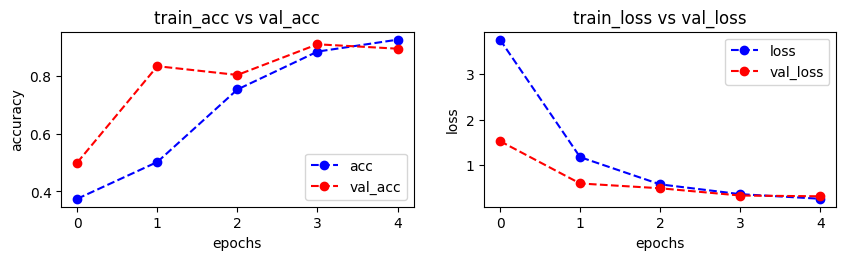

Number of 1º conv2D Filters: 6
Number of 2º conv2D Filters: 32
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 9s 1s/step - loss: 2.7087 - accuracy: 0.4345 - val_loss: 1.6986 - val_accuracy: 0.3485
Epoch 2/5
9/9 [==============================] - 8s 932ms/step - loss: 1.0883 - accuracy: 0.5693 - val_loss: 1.0371 - val_accuracy: 0.5152
Epoch 3/5
9/9 [==============================] - 8s 940ms/step - loss: 0.6528 - accuracy: 0.7528 - val_loss: 0.6647 - val_accuracy: 0.8182
Epoch 4/5
9/9 [==============================] - 8s 993ms/step - loss: 0.4663 - accuracy: 0.8727 - val_loss: 0.4505 - val_accuracy: 0.8939
Epoch 5/5
9/9 [==============================] - 8s 923ms/step - loss: 0.3005 - accuracy: 0.9213 - val_loss: 0.3187 - val_accuracy: 0.8939


Test Results:
3/3 [==============================] - 1s 141ms/step - loss: 0.4206 - accuracy: 0.8333





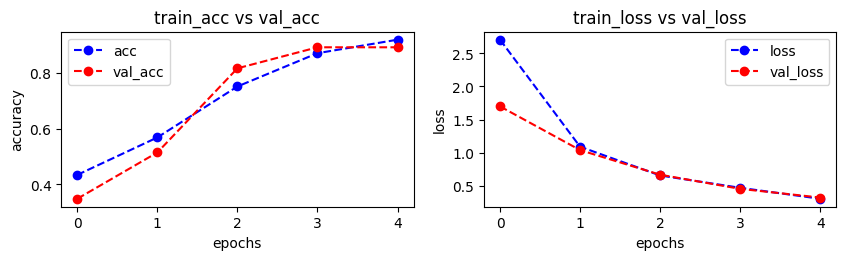

Number of 1º conv2D Filters: 6
Number of 2º conv2D Filters: 64
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 11s 1s/step - loss: 8.4212 - accuracy: 0.3184 - val_loss: 4.3754 - val_accuracy: 0.3788
Epoch 2/5
9/9 [==============================] - 10s 1s/step - loss: 3.0933 - accuracy: 0.4869 - val_loss: 0.5476 - val_accuracy: 0.7424
Epoch 3/5
9/9 [==============================] - 10s 1s/step - loss: 0.7918 - accuracy: 0.5993 - val_loss: 0.5289 - val_accuracy: 0.8333
Epoch 4/5
9/9 [==============================] - 10s 1s/step - loss: 0.4588 - accuracy: 0.8876 - val_loss: 0.4825 - val_accuracy: 0.9091
Epoch 5/5
9/9 [==============================] - 9s 1s/step - loss: 0.3468 - accuracy: 0.9326 - val_loss: 0.3528 - val_accuracy: 0.9091


Test Results:
3/3 [==============================] - 1s 146ms/step - loss: 0.4779 - accuracy: 0.9091





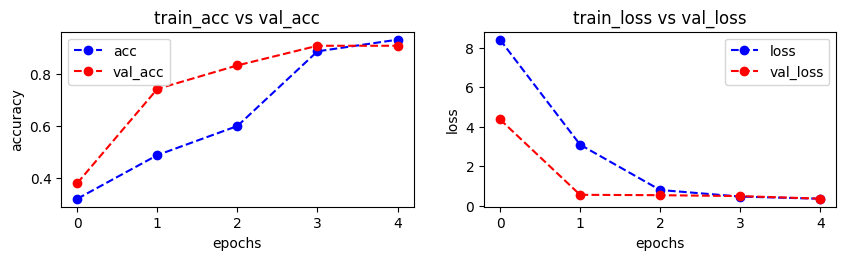

Number of 1º conv2D Filters: 6
Number of 2º conv2D Filters: 128
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 9s 961ms/step - loss: 1.0416 - accuracy: 0.5206 - val_loss: 0.8775 - val_accuracy: 0.8333
Epoch 2/5
9/9 [==============================] - 8s 914ms/step - loss: 0.6848 - accuracy: 0.8015 - val_loss: 0.4412 - val_accuracy: 0.9091
Epoch 3/5
9/9 [==============================] - 8s 920ms/step - loss: 0.3922 - accuracy: 0.8801 - val_loss: 0.4109 - val_accuracy: 0.9091
Epoch 4/5
9/9 [==============================] - 8s 899ms/step - loss: 0.4083 - accuracy: 0.8502 - val_loss: 0.3895 - val_accuracy: 0.8485
Epoch 5/5
9/9 [==============================] - 8s 954ms/step - loss: 0.3087 - accuracy: 0.8652 - val_loss: 0.4014 - val_accuracy: 0.8182


Test Results:
3/3 [==============================] - 1s 130ms/step - loss: 0.3694 - accuracy: 0.8485





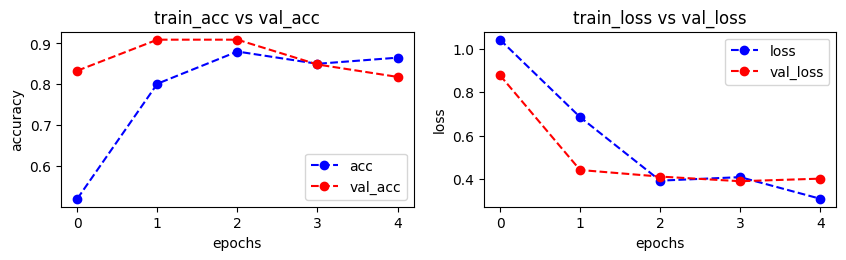

Number of 1º conv2D Filters: 16
Number of 2º conv2D Filters: 6
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 9s 1s/step - loss: 1.4844 - accuracy: 0.3333 - val_loss: 0.9971 - val_accuracy: 0.4242
Epoch 2/5
9/9 [==============================] - 8s 902ms/step - loss: 0.9377 - accuracy: 0.5581 - val_loss: 0.8614 - val_accuracy: 0.6364
Epoch 3/5
9/9 [==============================] - 8s 909ms/step - loss: 0.6447 - accuracy: 0.7715 - val_loss: 0.6205 - val_accuracy: 0.8030
Epoch 4/5
9/9 [==============================] - 8s 928ms/step - loss: 0.4017 - accuracy: 0.8689 - val_loss: 0.3117 - val_accuracy: 0.9394
Epoch 5/5
9/9 [==============================] - 8s 912ms/step - loss: 0.2996 - accuracy: 0.8764 - val_loss: 0.2282 - val_accuracy: 0.9242


Test Results:
3/3 [==============================] - 1s 129ms/step - loss: 0.4272 - accuracy: 0.8182





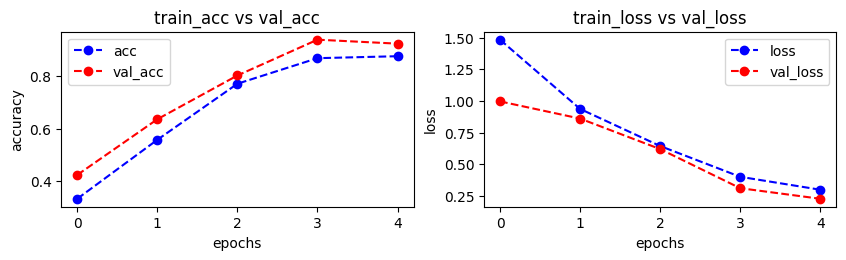

Number of 1º conv2D Filters: 16
Number of 2º conv2D Filters: 16
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 10s 1s/step - loss: 2.6104 - accuracy: 0.3670 - val_loss: 0.9431 - val_accuracy: 0.3636
Epoch 2/5
9/9 [==============================] - 9s 910ms/step - loss: 0.8567 - accuracy: 0.4906 - val_loss: 0.8062 - val_accuracy: 0.7576
Epoch 3/5
9/9 [==============================] - 8s 937ms/step - loss: 0.7087 - accuracy: 0.7491 - val_loss: 0.5453 - val_accuracy: 0.8788
Epoch 4/5
9/9 [==============================] - 9s 953ms/step - loss: 0.4195 - accuracy: 0.8989 - val_loss: 0.2998 - val_accuracy: 0.9545
Epoch 5/5
9/9 [==============================] - 9s 951ms/step - loss: 0.2957 - accuracy: 0.8951 - val_loss: 0.4234 - val_accuracy: 0.8182


Test Results:
3/3 [==============================] - 1s 134ms/step - loss: 0.3449 - accuracy: 0.8485





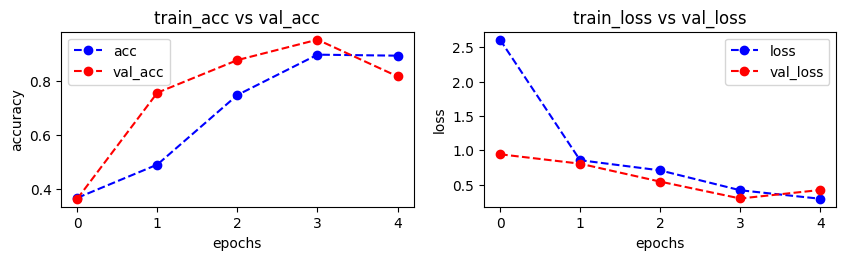

Number of 1º conv2D Filters: 16
Number of 2º conv2D Filters: 32
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 10s 1s/step - loss: 3.6671 - accuracy: 0.3745 - val_loss: 1.2716 - val_accuracy: 0.5909
Epoch 2/5
9/9 [==============================] - 9s 1s/step - loss: 0.8926 - accuracy: 0.5019 - val_loss: 0.9041 - val_accuracy: 0.6061
Epoch 3/5
9/9 [==============================] - 9s 1s/step - loss: 0.7298 - accuracy: 0.7041 - val_loss: 0.7396 - val_accuracy: 0.6818
Epoch 4/5
9/9 [==============================] - 9s 1s/step - loss: 0.4711 - accuracy: 0.8127 - val_loss: 0.3555 - val_accuracy: 0.8788
Epoch 5/5
9/9 [==============================] - 9s 1s/step - loss: 0.2426 - accuracy: 0.9026 - val_loss: 0.3279 - val_accuracy: 0.8788


Test Results:
3/3 [==============================] - 1s 137ms/step - loss: 0.3643 - accuracy: 0.8182





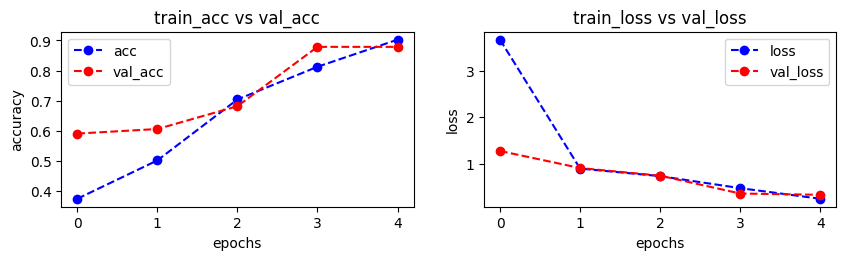

Number of 1º conv2D Filters: 16
Number of 2º conv2D Filters: 64
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 12s 1s/step - loss: 4.0839 - accuracy: 0.4307 - val_loss: 1.0819 - val_accuracy: 0.4697
Epoch 2/5
9/9 [==============================] - 10s 1s/step - loss: 0.8730 - accuracy: 0.5506 - val_loss: 0.7996 - val_accuracy: 0.7121
Epoch 3/5
9/9 [==============================] - 11s 1s/step - loss: 0.5589 - accuracy: 0.7940 - val_loss: 0.4657 - val_accuracy: 0.8333
Epoch 4/5
9/9 [==============================] - 11s 1s/step - loss: 0.2385 - accuracy: 0.9213 - val_loss: 0.3669 - val_accuracy: 0.8333
Epoch 5/5
9/9 [==============================] - 11s 1s/step - loss: 0.1275 - accuracy: 0.9513 - val_loss: 0.4071 - val_accuracy: 0.8182


Test Results:
3/3 [==============================] - 1s 164ms/step - loss: 0.2089 - accuracy: 0.9242





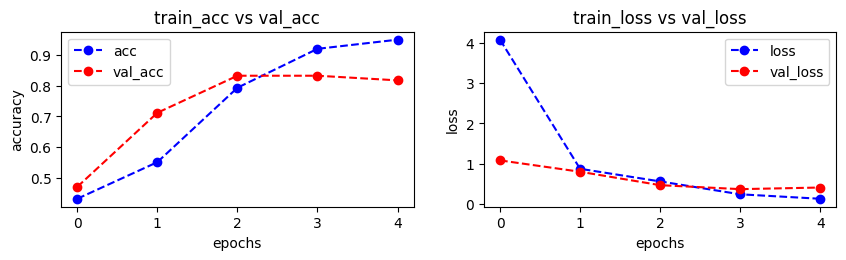

Number of 1º conv2D Filters: 16
Number of 2º conv2D Filters: 128
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 10s 1s/step - loss: 1.0364 - accuracy: 0.5056 - val_loss: 0.8635 - val_accuracy: 0.6212
Epoch 2/5
9/9 [==============================] - 10s 1s/step - loss: 0.7025 - accuracy: 0.7378 - val_loss: 0.5328 - val_accuracy: 0.8636
Epoch 3/5
9/9 [==============================] - 9s 1s/step - loss: 0.4811 - accuracy: 0.7978 - val_loss: 0.4748 - val_accuracy: 0.8182
Epoch 4/5
9/9 [==============================] - 9s 1s/step - loss: 0.3520 - accuracy: 0.8652 - val_loss: 0.3170 - val_accuracy: 0.9091
Epoch 5/5
9/9 [==============================] - 9s 1s/step - loss: 0.2838 - accuracy: 0.9176 - val_loss: 0.4187 - val_accuracy: 0.8333


Test Results:
3/3 [==============================] - 1s 136ms/step - loss: 0.3592 - accuracy: 0.8333





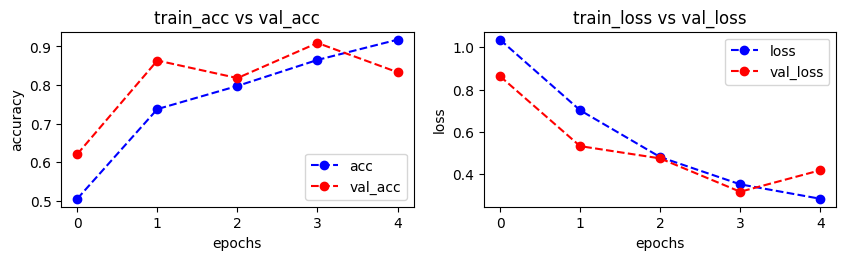

Number of 1º conv2D Filters: 32
Number of 2º conv2D Filters: 6
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 11s 1s/step - loss: 1.1425 - accuracy: 0.3970 - val_loss: 0.9405 - val_accuracy: 0.6061
Epoch 2/5
9/9 [==============================] - 10s 1s/step - loss: 0.7233 - accuracy: 0.7266 - val_loss: 0.5753 - val_accuracy: 0.9091
Epoch 3/5
9/9 [==============================] - 10s 1s/step - loss: 0.4230 - accuracy: 0.8240 - val_loss: 0.2882 - val_accuracy: 0.9242
Epoch 4/5
9/9 [==============================] - 10s 1s/step - loss: 0.2749 - accuracy: 0.8839 - val_loss: 0.3615 - val_accuracy: 0.8182
Epoch 5/5
9/9 [==============================] - 10s 1s/step - loss: 0.2446 - accuracy: 0.9026 - val_loss: 0.4925 - val_accuracy: 0.8030


Test Results:
3/3 [==============================] - 1s 142ms/step - loss: 0.4452 - accuracy: 0.8030





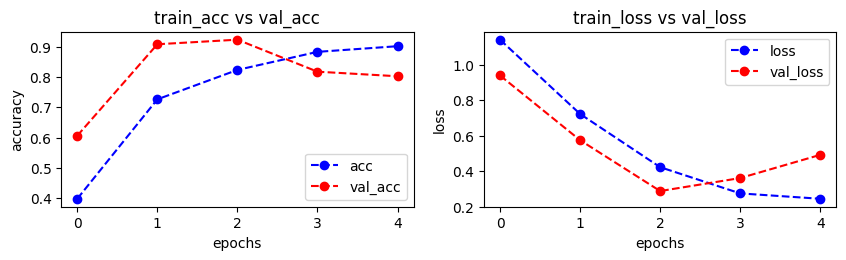

Number of 1º conv2D Filters: 32
Number of 2º conv2D Filters: 16
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 11s 1s/step - loss: 1.5005 - accuracy: 0.4195 - val_loss: 0.9933 - val_accuracy: 0.4091
Epoch 2/5
9/9 [==============================] - 10s 1s/step - loss: 0.7854 - accuracy: 0.6217 - val_loss: 0.6630 - val_accuracy: 0.8030
Epoch 3/5
9/9 [==============================] - 10s 1s/step - loss: 0.4495 - accuracy: 0.8277 - val_loss: 0.3296 - val_accuracy: 0.8788
Epoch 4/5
9/9 [==============================] - 10s 1s/step - loss: 0.2579 - accuracy: 0.9064 - val_loss: 0.6528 - val_accuracy: 0.7727
Epoch 5/5
9/9 [==============================] - 10s 1s/step - loss: 0.3047 - accuracy: 0.8801 - val_loss: 0.3738 - val_accuracy: 0.8788


Test Results:
3/3 [==============================] - 1s 143ms/step - loss: 0.3511 - accuracy: 0.8485





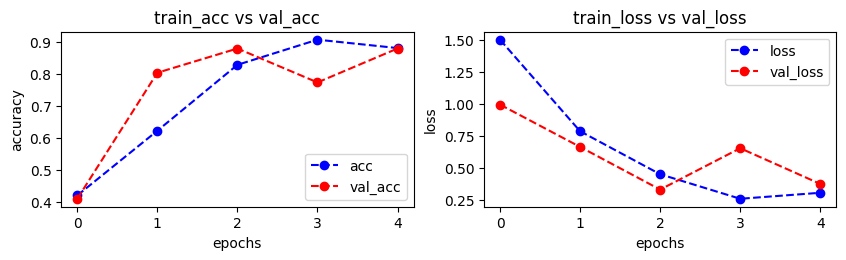

Number of 1º conv2D Filters: 32
Number of 2º conv2D Filters: 32
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 12s 1s/step - loss: 4.1123 - accuracy: 0.4232 - val_loss: 1.7489 - val_accuracy: 0.4242
Epoch 2/5
9/9 [==============================] - 11s 1s/step - loss: 0.8552 - accuracy: 0.6255 - val_loss: 0.7474 - val_accuracy: 0.7424
Epoch 3/5
9/9 [==============================] - 11s 1s/step - loss: 0.5442 - accuracy: 0.8502 - val_loss: 0.4419 - val_accuracy: 0.8939
Epoch 4/5
9/9 [==============================] - 11s 1s/step - loss: 0.2806 - accuracy: 0.9101 - val_loss: 0.2363 - val_accuracy: 0.9545
Epoch 5/5
9/9 [==============================] - 11s 1s/step - loss: 0.1604 - accuracy: 0.9625 - val_loss: 0.6299 - val_accuracy: 0.7576


Test Results:
3/3 [==============================] - 1s 156ms/step - loss: 0.3692 - accuracy: 0.8333





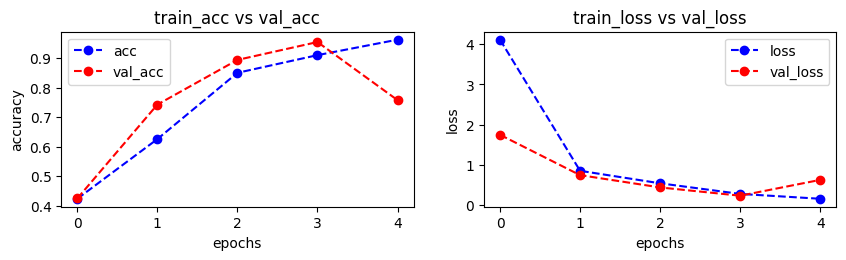

Number of 1º conv2D Filters: 32
Number of 2º conv2D Filters: 64
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 14s 1s/step - loss: 2.6455 - accuracy: 0.3970 - val_loss: 0.8081 - val_accuracy: 0.6667
Epoch 2/5
9/9 [==============================] - 12s 1s/step - loss: 0.7122 - accuracy: 0.7004 - val_loss: 0.6065 - val_accuracy: 0.8485
Epoch 3/5
9/9 [==============================] - 12s 1s/step - loss: 0.3989 - accuracy: 0.8951 - val_loss: 0.5183 - val_accuracy: 0.7727
Epoch 4/5
9/9 [==============================] - 12s 1s/step - loss: 0.2259 - accuracy: 0.9026 - val_loss: 0.3786 - val_accuracy: 0.8333
Epoch 5/5
9/9 [==============================] - 12s 1s/step - loss: 0.1013 - accuracy: 0.9813 - val_loss: 0.3387 - val_accuracy: 0.8788


Test Results:
3/3 [==============================] - 1s 186ms/step - loss: 0.2859 - accuracy: 0.8939





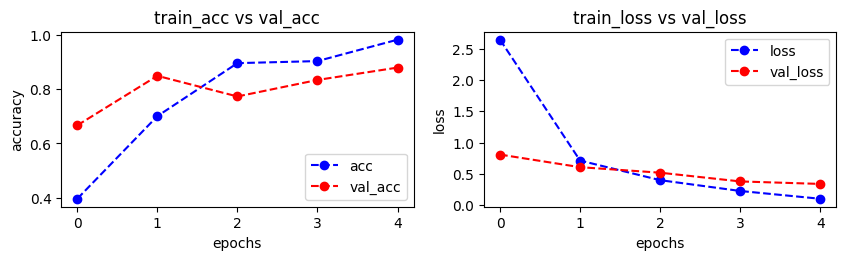

Number of 1º conv2D Filters: 32
Number of 2º conv2D Filters: 128
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 14s 1s/step - loss: 1.1137 - accuracy: 0.3071 - val_loss: 1.0335 - val_accuracy: 0.3333
Epoch 2/5
9/9 [==============================] - 13s 1s/step - loss: 0.8841 - accuracy: 0.5281 - val_loss: 0.7021 - val_accuracy: 0.7576
Epoch 3/5
9/9 [==============================] - 13s 1s/step - loss: 0.6404 - accuracy: 0.7266 - val_loss: 0.5064 - val_accuracy: 0.8485
Epoch 4/5
9/9 [==============================] - 12s 1s/step - loss: 0.5073 - accuracy: 0.7753 - val_loss: 0.4304 - val_accuracy: 0.8485
Epoch 5/5
9/9 [==============================] - 13s 1s/step - loss: 0.3701 - accuracy: 0.8464 - val_loss: 0.3283 - val_accuracy: 0.8788


Test Results:
3/3 [==============================] - 1s 179ms/step - loss: 0.3511 - accuracy: 0.8939





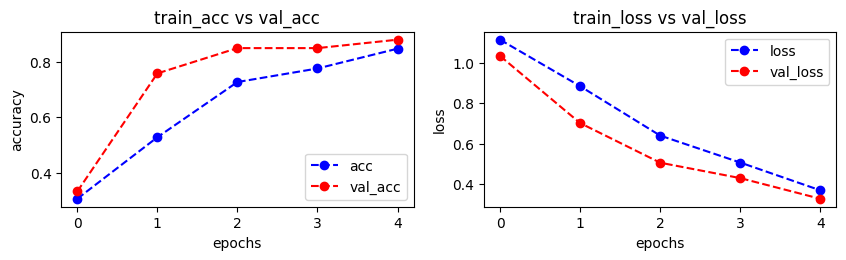

Number of 1º conv2D Filters: 64
Number of 2º conv2D Filters: 6
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 14s 2s/step - loss: 1.3041 - accuracy: 0.5019 - val_loss: 0.9598 - val_accuracy: 0.6818
Epoch 2/5
9/9 [==============================] - 13s 2s/step - loss: 0.7844 - accuracy: 0.6292 - val_loss: 0.5604 - val_accuracy: 0.8333
Epoch 3/5
9/9 [==============================] - 13s 1s/step - loss: 0.4805 - accuracy: 0.7828 - val_loss: 0.5783 - val_accuracy: 0.7727
Epoch 4/5
9/9 [==============================] - 13s 1s/step - loss: 0.4200 - accuracy: 0.8390 - val_loss: 0.4539 - val_accuracy: 0.8030
Epoch 5/5
9/9 [==============================] - 13s 1s/step - loss: 0.3301 - accuracy: 0.8914 - val_loss: 0.4894 - val_accuracy: 0.8030


Test Results:
3/3 [==============================] - 1s 175ms/step - loss: 0.8740 - accuracy: 0.6061





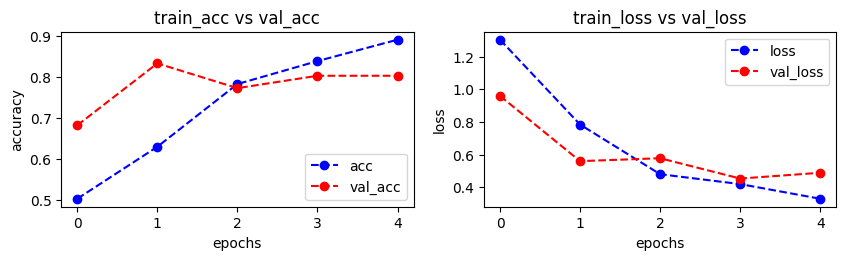

Number of 1º conv2D Filters: 64
Number of 2º conv2D Filters: 16
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 15s 2s/step - loss: 1.0831 - accuracy: 0.5393 - val_loss: 0.9104 - val_accuracy: 0.5303
Epoch 2/5
9/9 [==============================] - 14s 1s/step - loss: 0.6171 - accuracy: 0.7528 - val_loss: 0.5775 - val_accuracy: 0.7424
Epoch 3/5
9/9 [==============================] - 14s 1s/step - loss: 0.3547 - accuracy: 0.8577 - val_loss: 0.3638 - val_accuracy: 0.8788
Epoch 4/5
9/9 [==============================] - 14s 1s/step - loss: 0.2822 - accuracy: 0.8577 - val_loss: 0.3651 - val_accuracy: 0.8182
Epoch 5/5
9/9 [==============================] - 14s 1s/step - loss: 0.2143 - accuracy: 0.9101 - val_loss: 0.3144 - val_accuracy: 0.8788


Test Results:
3/3 [==============================] - 1s 194ms/step - loss: 0.3329 - accuracy: 0.8636





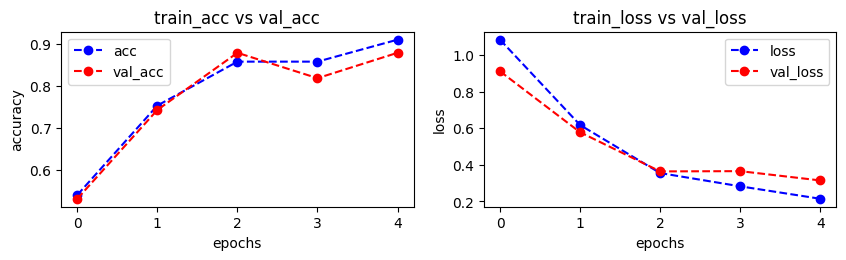

Number of 1º conv2D Filters: 64
Number of 2º conv2D Filters: 32
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 16s 2s/step - loss: 1.6624 - accuracy: 0.4195 - val_loss: 0.9646 - val_accuracy: 0.5909
Epoch 2/5
9/9 [==============================] - 14s 2s/step - loss: 0.7075 - accuracy: 0.6929 - val_loss: 0.5192 - val_accuracy: 0.8030
Epoch 3/5
9/9 [==============================] - 14s 2s/step - loss: 0.3732 - accuracy: 0.8652 - val_loss: 0.3096 - val_accuracy: 0.8939
Epoch 4/5
9/9 [==============================] - 15s 2s/step - loss: 0.2599 - accuracy: 0.8989 - val_loss: 0.4774 - val_accuracy: 0.8030
Epoch 5/5
9/9 [==============================] - 15s 2s/step - loss: 0.1730 - accuracy: 0.9476 - val_loss: 0.4403 - val_accuracy: 0.8485


Test Results:
3/3 [==============================] - 1s 210ms/step - loss: 0.4158 - accuracy: 0.8182





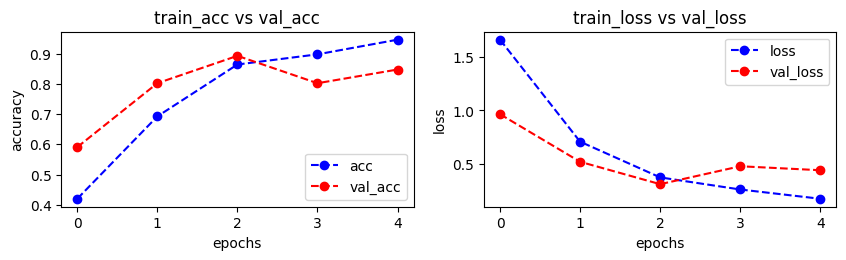

Number of 1º conv2D Filters: 64
Number of 2º conv2D Filters: 64
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 18s 2s/step - loss: 2.8266 - accuracy: 0.3670 - val_loss: 1.0379 - val_accuracy: 0.3333
Epoch 2/5
9/9 [==============================] - 16s 2s/step - loss: 0.8118 - accuracy: 0.6105 - val_loss: 0.5622 - val_accuracy: 0.8333
Epoch 3/5
9/9 [==============================] - 17s 2s/step - loss: 0.4492 - accuracy: 0.7978 - val_loss: 0.5170 - val_accuracy: 0.7576
Epoch 4/5
9/9 [==============================] - 16s 2s/step - loss: 0.2590 - accuracy: 0.9026 - val_loss: 0.3938 - val_accuracy: 0.8030
Epoch 5/5
9/9 [==============================] - 16s 2s/step - loss: 0.1353 - accuracy: 0.9625 - val_loss: 0.3120 - val_accuracy: 0.8939


Test Results:
3/3 [==============================] - 1s 228ms/step - loss: 0.3897 - accuracy: 0.8485





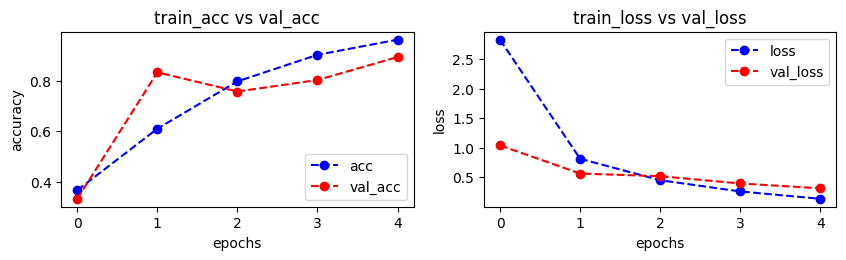

Number of 1º conv2D Filters: 64
Number of 2º conv2D Filters: 128
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 23s 2s/step - loss: 1.0483 - accuracy: 0.4607 - val_loss: 0.7942 - val_accuracy: 0.6364
Epoch 2/5
9/9 [==============================] - 22s 2s/step - loss: 0.6983 - accuracy: 0.6554 - val_loss: 0.6690 - val_accuracy: 0.7273
Epoch 3/5
9/9 [==============================] - 21s 2s/step - loss: 0.5895 - accuracy: 0.7566 - val_loss: 0.4569 - val_accuracy: 0.8333
Epoch 4/5
9/9 [==============================] - 21s 2s/step - loss: 0.4299 - accuracy: 0.8427 - val_loss: 0.4065 - val_accuracy: 0.8485
Epoch 5/5
9/9 [==============================] - 21s 2s/step - loss: 0.4052 - accuracy: 0.8352 - val_loss: 0.4180 - val_accuracy: 0.8485


Test Results:
3/3 [==============================] - 1s 254ms/step - loss: 0.3882 - accuracy: 0.8788





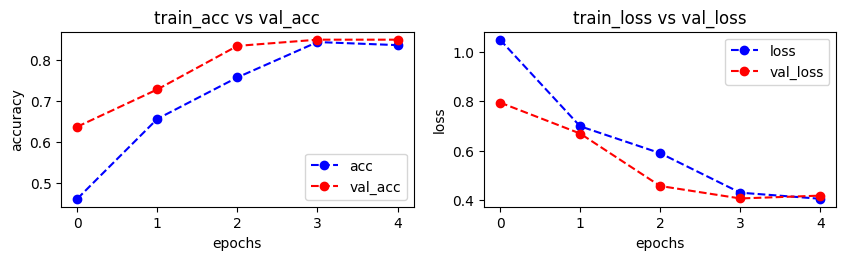

Number of 1º conv2D Filters: 128
Number of 2º conv2D Filters: 6
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 23s 2s/step - loss: 1.1566 - accuracy: 0.3820 - val_loss: 1.0671 - val_accuracy: 0.3485
Epoch 2/5
9/9 [==============================] - 21s 2s/step - loss: 0.9510 - accuracy: 0.4569 - val_loss: 0.8128 - val_accuracy: 0.6818
Epoch 3/5
9/9 [==============================] - 21s 2s/step - loss: 0.6629 - accuracy: 0.6891 - val_loss: 0.5176 - val_accuracy: 0.8182
Epoch 4/5
9/9 [==============================] - 20s 2s/step - loss: 0.4126 - accuracy: 0.8240 - val_loss: 0.6094 - val_accuracy: 0.7576
Epoch 5/5
9/9 [==============================] - 20s 2s/step - loss: 0.3117 - accuracy: 0.8727 - val_loss: 0.4406 - val_accuracy: 0.8333


Test Results:
3/3 [==============================] - 1s 266ms/step - loss: 0.3172 - accuracy: 0.9091





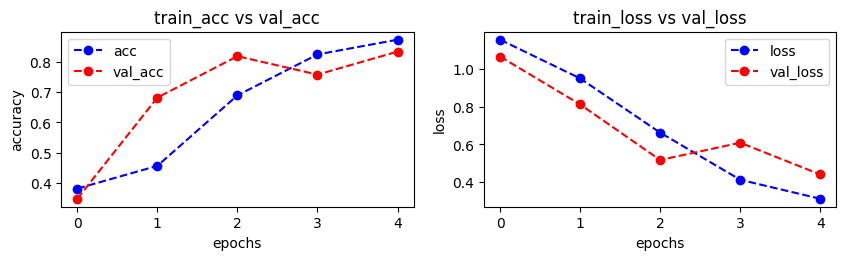

Number of 1º conv2D Filters: 128
Number of 2º conv2D Filters: 16
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 22s 2s/step - loss: 1.5889 - accuracy: 0.3408 - val_loss: 1.1106 - val_accuracy: 0.3333
Epoch 2/5
9/9 [==============================] - 21s 2s/step - loss: 0.9588 - accuracy: 0.3670 - val_loss: 0.9011 - val_accuracy: 0.6061
Epoch 3/5
9/9 [==============================] - 21s 2s/step - loss: 0.7144 - accuracy: 0.6629 - val_loss: 0.6076 - val_accuracy: 0.7273
Epoch 4/5
9/9 [==============================] - 21s 2s/step - loss: 0.5105 - accuracy: 0.7978 - val_loss: 0.6939 - val_accuracy: 0.7121
Epoch 5/5
9/9 [==============================] - 21s 2s/step - loss: 0.4372 - accuracy: 0.8202 - val_loss: 0.6274 - val_accuracy: 0.7273


Test Results:
3/3 [==============================] - 1s 269ms/step - loss: 0.6197 - accuracy: 0.7273





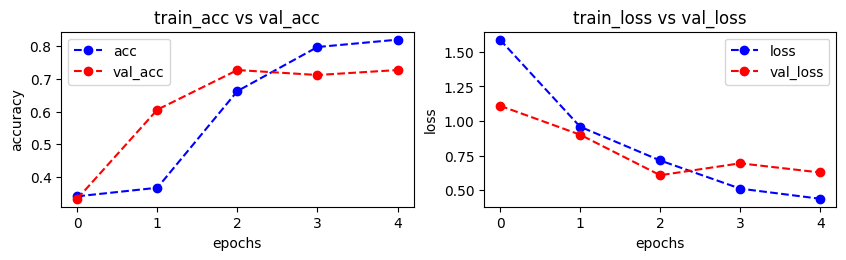

Number of 1º conv2D Filters: 128
Number of 2º conv2D Filters: 32
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 26s 3s/step - loss: 1.8412 - accuracy: 0.4157 - val_loss: 0.9969 - val_accuracy: 0.4242
Epoch 2/5
9/9 [==============================] - 23s 3s/step - loss: 0.8240 - accuracy: 0.5468 - val_loss: 0.7063 - val_accuracy: 0.7576
Epoch 3/5
9/9 [==============================] - 23s 3s/step - loss: 0.4902 - accuracy: 0.7978 - val_loss: 0.5598 - val_accuracy: 0.7424
Epoch 4/5
9/9 [==============================] - 23s 3s/step - loss: 0.3068 - accuracy: 0.8801 - val_loss: 0.4100 - val_accuracy: 0.8485
Epoch 5/5
9/9 [==============================] - 23s 2s/step - loss: 0.1597 - accuracy: 0.9551 - val_loss: 0.3828 - val_accuracy: 0.8485


Test Results:
3/3 [==============================] - 1s 288ms/step - loss: 0.2229 - accuracy: 0.9394





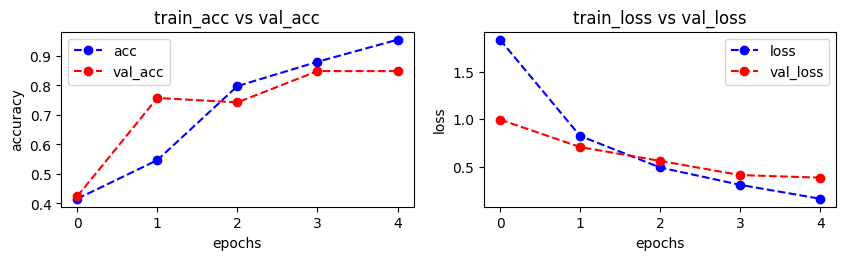

Number of 1º conv2D Filters: 128
Number of 2º conv2D Filters: 64
------------------------//------------------------//------------------------



Found 267 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
9/9 [==============================] - 27s 3s/step - loss: 2.3341 - accuracy: 0.3521 - val_loss: 0.9822 - val_accuracy: 0.3939
Epoch 2/5
9/9 [==============================] - 27s 3s/step - loss: 0.7789 - accuracy: 0.5581 - val_loss: 0.6582 - val_accuracy: 0.7424
Epoch 3/5
9/9 [==============================] - 32s 4s/step - loss: 0.4227 - accuracy: 0.8614 - val_loss: 0.7783 - val_accuracy: 0.6212
Epoch 4/5
9/9 [==============================] - 33s 4s/step - loss: 0.2726 - accuracy: 0.8839 - val_loss: 0.4284 - val_accuracy: 0.8333
Epoch 5/5
9/9 [==============================] - 35s 4s/step - loss: 0.1333 - accuracy: 0.9775 - val_loss: 0.3951 - val_accuracy: 0.8182


Test Results:
3/3 [==============================] - 2s 466ms/step - loss: 0.3363 - accuracy: 0.8182





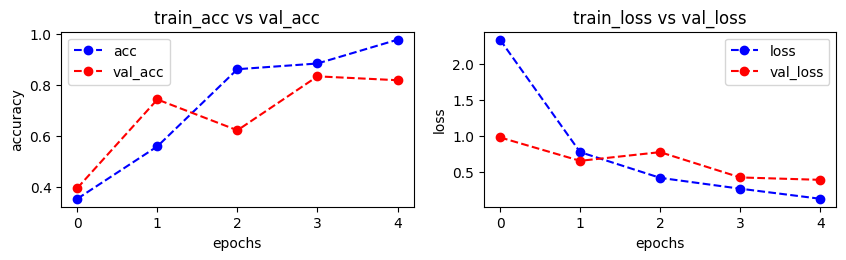

Number of 1º conv2D Filters: 128
Number of 2º conv2D Filters: 128
------------------------//------------------------//------------------------





In [58]:
n_filt_1 = [6,16,32,64,128]
n_filt_2 = [6,16,32,64,128]

for i, a in itertools.product(n_filt_1, n_filt_2):
        Base_CNN_Model = base_cnn(act_1='relu',
                                n_filt_1=i,
                                n_filt_2=a,
                                act_2='softmax',
                                kernel_size=(3,3),
                                pool_size=(2,2),
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim='adam',
                                loss_lambda='sparse_categorical_crossentropy',
                                metric='accuracy',
                                epoch=5,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Number of 1º conv2D Filters:", i)
        print("Number of 2º conv2D Filters:", a)
        print('------------------------//------------------------//------------------------')
        print("\n\n")
        

__Conclusion__

* Lets analyse each combination of Convolutional filters

Previous setting:
* Without Augmentarion
* Without Batch Normalization

__Best ones:__

>__Number of 1º conv2D Filters: 128__

>__Number of 2º conv2D Filters: 64__  

* Accuracy on Train: 0.9551

* Accuracy on Validation: 0.8485

* Accuracy on Test: 0.9394


>__Number of 1º conv2D Filters: 6__

>__Number of 2º conv2D Filters: 128__  

* Accuracy on Train: 0.9326

* Accuracy on Validation: 0.9091

* Accuracy on Test: 0.9091

*By Studying and check some feedbacks the correct approach is a increasing evolution of number of filters, the deeper the training the higher the filter, the 1º Layer is supposed to keep low level features and following convolution layers should get high level features.  

***
### <font color='white'> __3.4 Activation Function__ </font> <a class="anchor" id="threefour"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Will be tested:

* Sigmoid ( Not applicable is for binary classifications)

* Relu, rectifier or ReLU (rectified linear unit)

* Tanh

* Softmax (Perfect to be used in the end of the Network once it takes the raw outputs and transforms them into probablity of each class)

* By default and by investigate feedbacks, softmax is fixed in the end of the testing although the other 2 will be test.

* Ephocs number is back to 10 once this test will take less time and resources

__Vanishing gradient:__
* The value of the product of derivative decreases until at some point the partial derivative of the loss function approaches a value close to zero, effectively preventing the weight from changing its value.[1] In the worst case, this may completely stop the neural network from further training

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 8.1587 - accuracy: 0.4179 - val_loss: 4.3967 - val_accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 6s 838ms/step - loss: 2.5300 - accuracy: 0.5075 - val_loss: 1.2022 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 6s 845ms/step - loss: 0.4461 - accuracy: 0.8060 - val_loss: 0.6321 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 6s 834ms/step - loss: 0.2577 - accuracy: 0.8955 - val_loss: 0.3415 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 6s 831ms/step - loss: 0.1564 - accuracy: 0.9751 - val_loss: 0.2622 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 6s 849ms/step - loss: 0.1021 - accuracy: 0.9701 - val_loss: 0.2277 - val_accuracy: 0.9200
Epoch 7/10
7/7 [==============================] - 6s 836ms/step - loss: 0.0555 - accuracy: 0.9950 - val_loss: 0.2025 - val_accuracy: 0.9200
Epoc

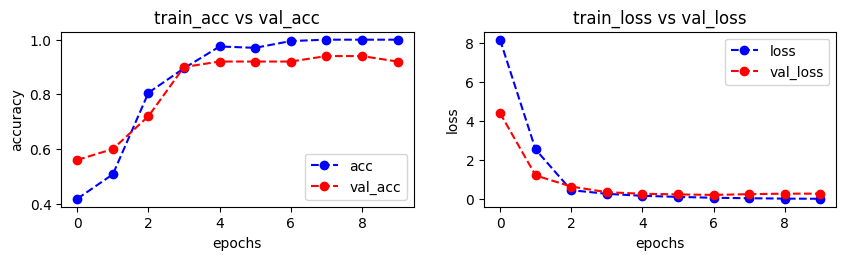

Activation Function: relu
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 12.2512 - accuracy: 0.4328 - val_loss: 5.0657 - val_accuracy: 0.6800
Epoch 2/10
7/7 [==============================] - 6s 845ms/step - loss: 2.9919 - accuracy: 0.5473 - val_loss: 3.7707 - val_accuracy: 0.7000
Epoch 3/10
7/7 [==============================] - 6s 881ms/step - loss: 1.9501 - accuracy: 0.6716 - val_loss: 2.0704 - val_accuracy: 0.5800
Epoch 4/10
7/7 [==============================] - 6s 852ms/step - loss: 0.7185 - accuracy: 0.8060 - val_loss: 0.4662 - val_accuracy: 0.8600
Epoch 5/10
7/7 [==============================] - 6s 867ms/step - loss: 0.3363 - accuracy: 0.8905 - val_loss: 0.6794 - val_accuracy: 0.8600
Epoch 6/10
7/7 [==============================] - 6s 849ms/step - loss: 0.2315 - accuracy: 0.9154 - val_loss: 0.3820 - val_accuracy: 0.8800
Epoch 7/10
7/7 [==============================] - 6s 947ms/step - loss: 0.1696 - accuracy: 0.9403 - val_loss: 0.3911 - val_accuracy: 0.9000
Epo

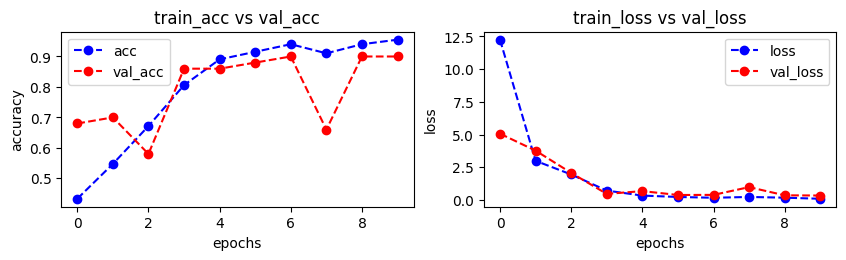

Activation Function: tanh
------------------------//------------------------//------------------------





In [8]:
act_1 = ['relu','tanh']
for i in act_1:
        Base_CNN_Model = base_cnn(act_1=i,
                                n_filt_1=6,
                                n_filt_2=128,
                                act_2='softmax',
                                kernel_size=(3,3),
                                pool_size=(2,2),
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim='adam',
                                loss_lambda='sparse_categorical_crossentropy',
                                metric='accuracy',
                                epoch=10,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Activation Function:", i)
        print('------------------------//------------------------//------------------------')
        print("\n\n")
        

__Conclusion__

* Lets analyse each combination of Convolutional filters

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128

>__Tanh__

* Accuracy on Train: 0.9552

* Accuracy on Validation: 0.9000 

* Accuracy on Test: 0.8485

>__relu__

* Accuracy on Train: 1.0000 

* Accuracy on Validation: 0.9200 

* Accuracy on Test: 0.9242

Once with Relu we get a 1 score in Train without overfitting, because test accuracy is 0.9242 and validate 0.9200, and in overall is better then Tanh with go move forward with __relu__.


***
### <font color='white'> __3.5 The Kernel Size__ </font> <a class="anchor" id="threefive"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

*Now that we have convolution filter size as one of the hyper-parameters to choose from, a choice needs to be made between smaller or larger filter size.

*Is a good approach to allways choose a odd number because for an odd-sized filter, all the previous layer pixels would be symmetrically around the output pixel. Without this symmetry, we will have to account for distortions across the layers which happens when using an even sized kernel.

*A convolution example for small (3x3) and large filter sizes (5x5) this are the performing ones to be choosen, avoid even number and missing interpretation and information of pixels possible patterns.

Will be test 3x3 and 5x5

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 977ms/step - loss: 5.9230 - accuracy: 0.4975 - val_loss: 2.9482 - val_accuracy: 0.6000
Epoch 2/10
7/7 [==============================] - 6s 843ms/step - loss: 1.2332 - accuracy: 0.6318 - val_loss: 0.7825 - val_accuracy: 0.7400
Epoch 3/10
7/7 [==============================] - 6s 830ms/step - loss: 0.4465 - accuracy: 0.8408 - val_loss: 0.7518 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 6s 954ms/step - loss: 0.1991 - accuracy: 0.9303 - val_loss: 0.3722 - val_accuracy: 0.8600
Epoch 5/10
7/7 [==============================] - 6s 842ms/step - loss: 0.1716 - accuracy: 0.9303 - val_loss: 0.4277 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 6s 858ms/step - loss: 0.1215 - accuracy: 0.9552 - val_loss: 0.3059 - val_accuracy: 0.9200
Epoch 7/10
7/7 [==============================] - 6s 908ms/step - loss: 0.0587 - accuracy: 0.9801 - val_loss: 0.2220 - val_accuracy: 0.9400
E

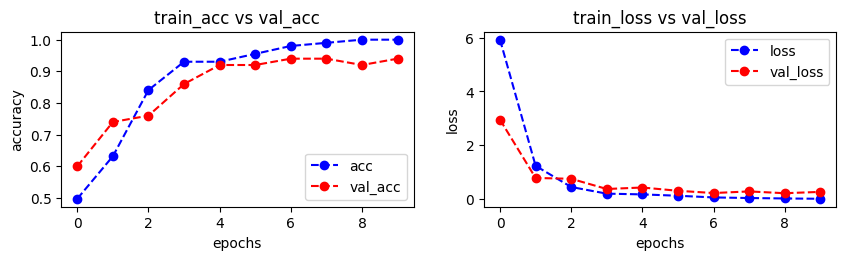

Kernel Size: (3, 3)
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 2.5789 - accuracy: 0.4627 - val_loss: 1.0009 - val_accuracy: 0.4600
Epoch 2/10
7/7 [==============================] - 7s 923ms/step - loss: 0.6832 - accuracy: 0.7761 - val_loss: 0.4512 - val_accuracy: 0.9200
Epoch 3/10
7/7 [==============================] - 7s 917ms/step - loss: 0.2324 - accuracy: 0.9204 - val_loss: 0.2366 - val_accuracy: 0.9200
Epoch 4/10
7/7 [==============================] - 7s 944ms/step - loss: 0.1661 - accuracy: 0.9104 - val_loss: 0.2764 - val_accuracy: 0.9400
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.0748 - accuracy: 0.9701 - val_loss: 0.1629 - val_accuracy: 0.9600
Epoch 6/10
7/7 [==============================] - 7s 926ms/step - loss: 0.0497 - accuracy: 0.9950 - val_loss: 0.2573 - val_accuracy: 0.9200
Epoch 7/10
7/7 [==============================] - 7s 938ms/step - loss: 0.0277 - accuracy: 0.9950 - val_loss: 0.1559 - val_accuracy: 0.9200
Epoch 8

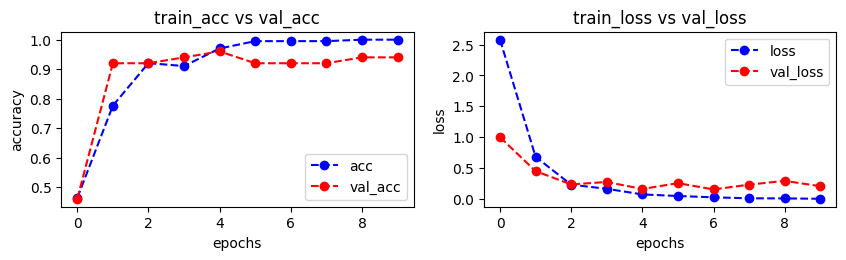

Kernel Size: (5, 5)
------------------------//------------------------//------------------------





In [9]:
kernel_size = [(3,3),(5,5)]
for i in kernel_size:
        Base_CNN_Model = base_cnn(act_1='relu',
                                n_filt_1=6,
                                n_filt_2=128,
                                act_2='softmax',
                                kernel_size=i,
                                pool_size=(2,2),
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim='adam',
                                loss_lambda='sparse_categorical_crossentropy',
                                metric='accuracy',
                                epoch=10,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Kernel Size:", i)
        print('------------------------//------------------------//------------------------')
        print("\n\n")
        

__Conclusion__

* Lets analyse each combination of Convolutional Kernel Sizes

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128
* Activation function : 'relu' 

>__3x3__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9400 

* Accuracy on Test: 0.9394

>__5x5__

* Accuracy on Train: 1.0000 

* Accuracy on Validation: 0.9400

* Accuracy on Test: 0.8939


Will be remained 3x3 and as thery confirm 5x5 is for more dense images for much larger and it results in missing information.



***
### <font color='white'> __3.6 The Max Pooling Size__ </font> <a class="anchor" id="threesix"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

*  Used for downscaling image by extracting most important features, remove shift, rotation and scale

* Applying a 3x3 MaxPooling2D on a matrix of shape (3,3,1) would result in a (1,1,1) matrix, and applying a 2x2 MaxPooling2D on a matrix of shape (3,3,1) would result in a (2,2,1) matrix. Obviously (2,2,1) matrix can keep more data than a matrix of shape (1,1,1).

So theres no necessity of testing, will remain a 2x2


__Conclusion__

Keep 2x2 in MaxPooling size

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters : 1º = 6 and 2º = 128
* Activation function : 'relu'
* The Kernel size : 3x3
* The Max Pooling Size : 2x2

***
### <font color='white'> __3.7 Optimizers__ </font> <a class="anchor" id="threeseven"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Optimizer use two type of paramenter that are essential
> Learning Rate (lr)
* This should be defined in the optimzer with is the step size at which the optimizer updates the weights of the neural network during the training process.

> Momentum 
* The momentum parameter specifies the amount of momentum to use for the gradient updates, which can help accelerate the convergence of the optimization process. Of motion of a moving body, measured as a product of its mass and velocity

<br>
<br>

Exist several optimizers that can be used in this type of problems, multiclassification, which are:

> Stochastic Gradient Descent (SGD)

* SGD works by updating the model's parameters in the direction of the negative gradient of the loss function.
* Simple and computationally efficient optimization algorithm.
* Can get stuck in local minima and suffer from slow convergence when the learning rate is too high or too low.

> Adaptive Moment Estimation (Adam)

* Is an extension of stochastic gradient descent (SGD) that uses adaptive learning rates for each parameter in the model, based on the first and second moments of the gradients.
* Adam works by computing the running average of the gradient and its square for each parameter, and then using those averages to update the learning rate for that parameter.


> Root Mean Square Propagation (RMSProp)

* Update of SGD.
* Like SGD, RMSProp updates the model's parameters by moving them in the direction of the negative gradient of the loss function.
* Uses a moving average of the squared gradients to adjust the learning rate for each parameter in the model.

> Adagrad

* Update of SGD.
* Adagrad adapts the learning rate for each parameter based on the history of the gradients for that parameter.

> Adadelta

* Update of Adagrad
* Like Adagrad, Adadelta adapts the learning rate for each parameter based on the history of the gradients. However, instead of accumulating all past gradients, Adadelta uses a sliding window of the past gradients to compute a running estimate of the second moment of the gradients.

> Nesterov Accelerated Gradient (NAG)

* Incorporates a momentum term to accelerate the convergence of the optimization process. The momentum term helps to smooth out the gradient updates and allows the algorithm to move more quickly in the direction of the optimal solution.

> Adamax

* Update of Adam
* Extension of the Adam optimizer that uses the infinity norm (maximum value) of the gradients to update the model's parameters, rather than the L2 norm used in Adam.
* Computes the running average of the gradient and its infinity norm for each parameter, and then uses those averages to update the learning rate for that parameter.
* Especially for problems that involve large datasets and high-dimensional parameter spaces.

> Nadam

* Optimization algorithm that is a combination of the Nesterov Accelerated Gradient (NAG) optimizer and the Adam optimizer.
* Similar approach to Adam for computing the running averages of the gradient and its square, but it incorporates the momentum term to compute a momentum-corrected gradient estimate. The momentum-corrected gradient is then used to update the adaptive learning rates, which are used to update the model's parameters.

<br>
<br>
<br>

_*Once the possible optimizers are a 8 the test will be performed with 5 epoch for each avoiding to much resources_

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 1s/step - loss: 0.8958 - accuracy: 0.5920 - val_loss: 0.6474 - val_accuracy: 0.8000
Epoch 2/5
7/7 [==============================] - 6s 853ms/step - loss: 0.4138 - accuracy: 0.8657 - val_loss: 0.4503 - val_accuracy: 0.8800
Epoch 3/5
7/7 [==============================] - 6s 830ms/step - loss: 0.2621 - accuracy: 0.9154 - val_loss: 0.4878 - val_accuracy: 0.8200
Epoch 4/5
7/7 [==============================] - 6s 844ms/step - loss: 0.2617 - accuracy: 0.9005 - val_loss: 0.4428 - val_accuracy: 0.8200
Epoch 5/5
7/7 [==============================] - 6s 831ms/step - loss: 0.2392 - accuracy: 0.8955 - val_loss: 0.5492 - val_accuracy: 0.8000


Test Results:
3/3 [==============================] - 1s 170ms/step - loss: 0.6818 - accuracy: 0.8030





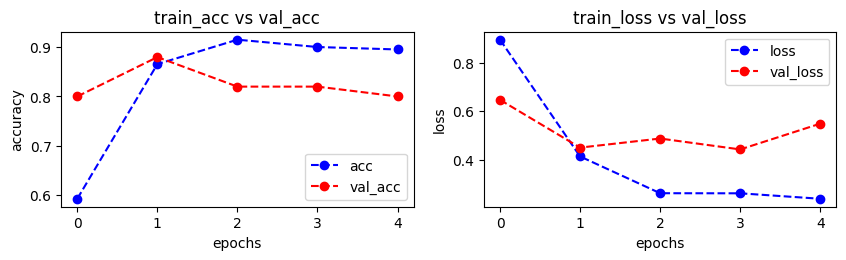

Optimizer: <keras.optimizers.legacy.gradient_descent.SGD object at 0x000001A7995766D0>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 974ms/step - loss: 4.4802 - accuracy: 0.4826 - val_loss: 4.4916 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 6s 924ms/step - loss: 2.0070 - accuracy: 0.6119 - val_loss: 0.7690 - val_accuracy: 0.7200
Epoch 3/5
7/7 [==============================] - 6s 805ms/step - loss: 0.5919 - accuracy: 0.8109 - val_loss: 0.6173 - val_accuracy: 0.8000
Epoch 4/5
7/7 [==============================] - 6s 805ms/step - loss: 0.2825 - accuracy: 0.8905 - val_loss: 0.3865 - val_accuracy: 0.9000
Epoch 5/5
7/7 [==============================] - 6s 824ms/step - loss: 0.1651 - accuracy: 0.9303 - val_loss: 0.4011 - val_accuracy: 0.8400


Test Results:
3/3 [==============================] - 1s 153ms/step - loss: 0.5050 - accuracy: 0.8030





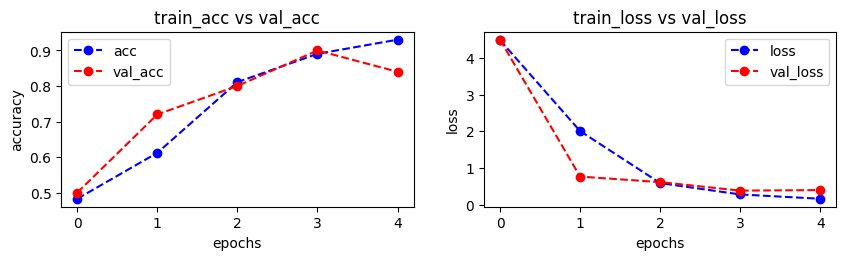

Optimizer: <keras.optimizers.legacy.adam.Adam object at 0x000001A799544DD0>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 955ms/step - loss: 14.0177 - accuracy: 0.4975 - val_loss: 0.8659 - val_accuracy: 0.6600
Epoch 2/5
7/7 [==============================] - 6s 839ms/step - loss: 2.3686 - accuracy: 0.6716 - val_loss: 0.4754 - val_accuracy: 0.8400
Epoch 3/5
7/7 [==============================] - 6s 841ms/step - loss: 0.9935 - accuracy: 0.7313 - val_loss: 0.7471 - val_accuracy: 0.7400
Epoch 4/5
7/7 [==============================] - 6s 830ms/step - loss: 0.1940 - accuracy: 0.9403 - val_loss: 0.3298 - val_accuracy: 0.8800
Epoch 5/5
7/7 [==============================] - 6s 813ms/step - loss: 0.5003 - accuracy: 0.8856 - val_loss: 0.7207 - val_accuracy: 0.7600


Test Results:
3/3 [==============================] - 1s 168ms/step - loss: 0.9756 - accuracy: 0.7121





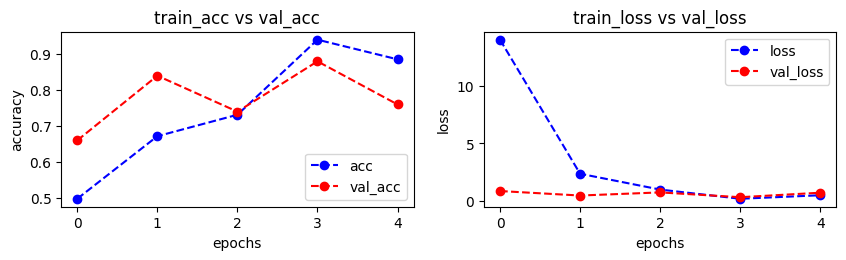

Optimizer: <keras.optimizers.legacy.rmsprop.RMSprop object at 0x000001A797073F90>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 912ms/step - loss: 1.5857 - accuracy: 0.4378 - val_loss: 1.5429 - val_accuracy: 0.4600
Epoch 2/5
7/7 [==============================] - 6s 840ms/step - loss: 0.8101 - accuracy: 0.6866 - val_loss: 0.6091 - val_accuracy: 0.8600
Epoch 3/5
7/7 [==============================] - 6s 815ms/step - loss: 0.7036 - accuracy: 0.7214 - val_loss: 0.5727 - val_accuracy: 0.7600
Epoch 4/5
7/7 [==============================] - 6s 816ms/step - loss: 0.4271 - accuracy: 0.8657 - val_loss: 0.4944 - val_accuracy: 0.8800
Epoch 5/5
7/7 [==============================] - 6s 807ms/step - loss: 0.4540 - accuracy: 0.8706 - val_loss: 0.4657 - val_accuracy: 0.8800


Test Results:
3/3 [==============================] - 1s 164ms/step - loss: 0.5426 - accuracy: 0.7879





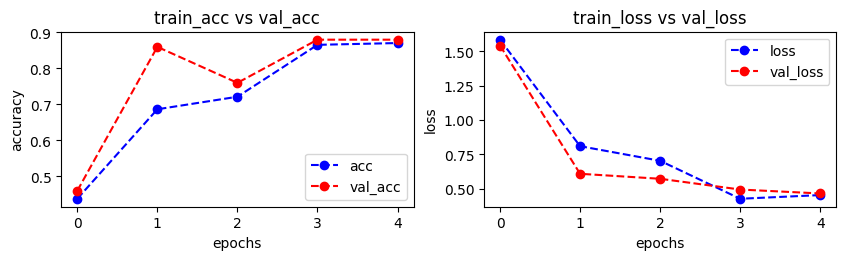

Optimizer: <keras.optimizers.legacy.adagrad.Adagrad object at 0x000001A792921B90>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 940ms/step - loss: 10.0363 - accuracy: 0.3582 - val_loss: 3.6559 - val_accuracy: 0.6600
Epoch 2/5
7/7 [==============================] - 6s 898ms/step - loss: 1.1525 - accuracy: 0.7662 - val_loss: 1.9843 - val_accuracy: 0.3000
Epoch 3/5
7/7 [==============================] - 6s 830ms/step - loss: 0.8891 - accuracy: 0.7960 - val_loss: 0.3602 - val_accuracy: 0.9000
Epoch 4/5
7/7 [==============================] - 6s 834ms/step - loss: 0.2005 - accuracy: 0.9204 - val_loss: 0.2828 - val_accuracy: 0.8600
Epoch 5/5
7/7 [==============================] - 6s 917ms/step - loss: 0.4879 - accuracy: 0.8507 - val_loss: 0.3040 - val_accuracy: 0.9000


Test Results:
3/3 [==============================] - 1s 160ms/step - loss: 0.4264 - accuracy: 0.8182





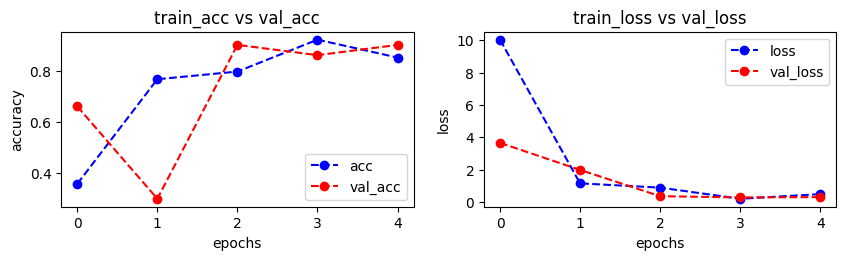

Optimizer: <keras.optimizers.legacy.adadelta.Adadelta object at 0x000001A799831010>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 1s/step - loss: 0.9765 - accuracy: 0.5871 - val_loss: 0.6417 - val_accuracy: 0.7400
Epoch 2/5
7/7 [==============================] - 6s 814ms/step - loss: 0.5163 - accuracy: 0.8259 - val_loss: 0.4885 - val_accuracy: 0.7800
Epoch 3/5
7/7 [==============================] - 6s 819ms/step - loss: 0.2814 - accuracy: 0.9104 - val_loss: 0.4326 - val_accuracy: 0.8800
Epoch 4/5
7/7 [==============================] - 6s 809ms/step - loss: 0.2705 - accuracy: 0.8955 - val_loss: 0.3771 - val_accuracy: 0.8800
Epoch 5/5
7/7 [==============================] - 6s 844ms/step - loss: 0.2187 - accuracy: 0.9104 - val_loss: 0.4459 - val_accuracy: 0.8400


Test Results:
3/3 [==============================] - 1s 154ms/step - loss: 0.5407 - accuracy: 0.8333





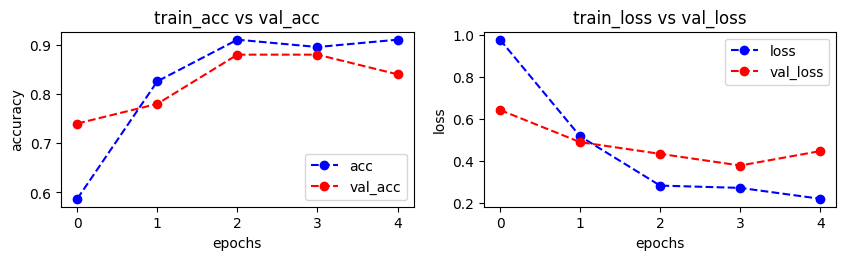

Optimizer: <keras.optimizers.legacy.gradient_descent.SGD object at 0x000001A7994C78D0>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 935ms/step - loss: 5.4642 - accuracy: 0.3383 - val_loss: 1.3027 - val_accuracy: 0.4600
Epoch 2/5
7/7 [==============================] - 6s 921ms/step - loss: 1.3005 - accuracy: 0.6766 - val_loss: 0.8686 - val_accuracy: 0.6800
Epoch 3/5
7/7 [==============================] - 6s 806ms/step - loss: 0.4086 - accuracy: 0.8507 - val_loss: 0.6986 - val_accuracy: 0.7600
Epoch 4/5
7/7 [==============================] - 6s 811ms/step - loss: 0.2642 - accuracy: 0.9005 - val_loss: 0.4898 - val_accuracy: 0.8400
Epoch 5/5
7/7 [==============================] - 6s 825ms/step - loss: 0.2119 - accuracy: 0.9154 - val_loss: 0.4774 - val_accuracy: 0.8400


Test Results:
3/3 [==============================] - 1s 157ms/step - loss: 0.5325 - accuracy: 0.7879





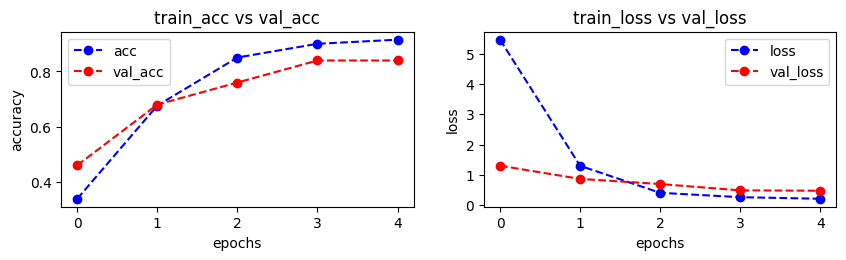

Optimizer: <keras.optimizers.legacy.adamax.Adamax object at 0x000001A79970C190>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/5
7/7 [==============================] - 7s 964ms/step - loss: 7.4706 - accuracy: 0.4328 - val_loss: 4.0080 - val_accuracy: 0.6600
Epoch 2/5
7/7 [==============================] - 6s 848ms/step - loss: 1.3016 - accuracy: 0.6816 - val_loss: 0.8690 - val_accuracy: 0.7600
Epoch 3/5
7/7 [==============================] - 6s 837ms/step - loss: 0.3650 - accuracy: 0.9005 - val_loss: 0.3566 - val_accuracy: 0.9000
Epoch 4/5
7/7 [==============================] - 6s 935ms/step - loss: 0.2870 - accuracy: 0.8856 - val_loss: 0.3973 - val_accuracy: 0.9000
Epoch 5/5
7/7 [==============================] - 6s 804ms/step - loss: 0.2420 - accuracy: 0.9154 - val_loss: 0.3717 - val_accuracy: 0.8800


Test Results:
3/3 [==============================] - 1s 132ms/step - loss: 0.5243 - accuracy: 0.8333





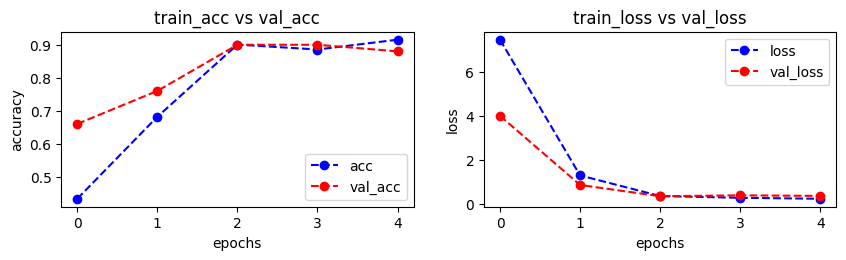

Optimizer: <keras.optimizers.legacy.nadam.Nadam object at 0x000001A79785E350>
------------------------//------------------------//------------------------





In [13]:
# Learning rates and Momentums are defined as default

optimizers = [SGD(lr=0.001, momentum=0.9),
                Adam(lr=0.001),
                RMSprop(lr=0.001),
                Adagrad(lr=0.001),
                Adadelta(lr=1.0),                                             
                SGD(lr=0.001, momentum=0.9, nesterov=True),                       # This is NAG, just simply changing a paramenter of SGD 
                Adamax(lr=0.001),                                             
                Nadam(lr=0.001)
                ]
for i in optimizers:
        Base_CNN_Model = base_cnn(act_1='relu',                                     # Best Act. Function by previous tests
                                n_filt_1=6,                                       # Best Nº of Convolutional filters by previous tests
                                n_filt_2=128,                                        # Best Nº of Convolutional filters by previous tests
                                act_2='softmax',                                    # Best Act. Function by previous tests
                                kernel_size=(3,3),                                  # Best Kernel size by previous tests   
                                pool_size=(2,2),                                    # Best MaxPooling size by previous tests
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim=i,
                                loss_lambda='sparse_categorical_crossentropy',
                                metric='accuracy',
                                epoch=5,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Optimizer:", i)
        print('------------------------//------------------------//------------------------')
        print("\n\n")


__Conclusion__

* Lets analyse each optimizer in the list 

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128
* Activation function : 'relu' 

>__SGD__

* Accuracy on Train: 0.8955

* Accuracy on Validation: 0.8000 

* Accuracy on Test: 0.8030

>__Adam__

* Accuracy on Train: 0.9303 

* Accuracy on Validation: 0.8400

* Accuracy on Test: 0.8030

>__RMSprop__

* Accuracy on Train: 0.8856 

* Accuracy on Validation: 0.7600

* Accuracy on Test: 0.7121

>__Adagrad__

* Accuracy on Train: 0.8706

* Accuracy on Validation: 0.8800

* Accuracy on Test: 0.7879

>__Adadelta__

* Accuracy on Train: 0.8507

* Accuracy on Validation: 0.9000

* Accuracy on Test: 0.8182

>__NAG__

* Accuracy on Train: 0.9104

* Accuracy on Validation: 0.8400

* Accuracy on Test: 0.8333

>__Adamax__

* Accuracy on Train: 0.9154

* Accuracy on Validation: 0.8400

* Accuracy on Test: 0.7879

>__Nadam__

* Accuracy on Train: 0.9154

* Accuracy on Validation: 0.8800

* Accuracy on Test: 0.8333


The best Scores were for Adam, NAG and Nadam, once we used 5 ephocs will be performed a new test with 10 ephocs for this three




Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 4.1559 - accuracy: 0.5174 - val_loss: 2.3295 - val_accuracy: 0.6600
Epoch 2/10
7/7 [==============================] - 6s 979ms/step - loss: 1.1635 - accuracy: 0.6368 - val_loss: 0.5247 - val_accuracy: 0.8400
Epoch 3/10
7/7 [==============================] - 6s 849ms/step - loss: 0.4468 - accuracy: 0.8209 - val_loss: 0.5416 - val_accuracy: 0.7200
Epoch 4/10
7/7 [==============================] - 6s 846ms/step - loss: 0.2638 - accuracy: 0.9005 - val_loss: 0.2948 - val_accuracy: 0.9000
Epoch 5/10
7/7 [==============================] - 6s 831ms/step - loss: 0.1494 - accuracy: 0.9602 - val_loss: 0.2627 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 6s 832ms/step - loss: 0.0879 - accuracy: 0.9801 - val_loss: 0.2103 - val_accuracy: 0.9400
Epoch 7/10
7/7 [==============================] - 6s 845ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.2002 - val_accuracy: 0.9200
Epoc

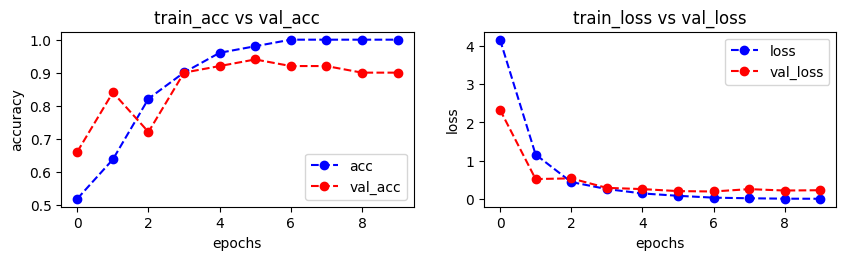

Optimizer: <keras.optimizers.legacy.adam.Adam object at 0x000001A78F28CE10>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 981ms/step - loss: 0.9611 - accuracy: 0.5721 - val_loss: 0.6172 - val_accuracy: 0.8400
Epoch 2/10
7/7 [==============================] - 6s 829ms/step - loss: 0.4172 - accuracy: 0.8607 - val_loss: 0.4293 - val_accuracy: 0.8600
Epoch 3/10
7/7 [==============================] - 6s 840ms/step - loss: 0.2524 - accuracy: 0.9104 - val_loss: 0.4333 - val_accuracy: 0.8400
Epoch 4/10
7/7 [==============================] - 6s 828ms/step - loss: 0.2435 - accuracy: 0.9005 - val_loss: 0.4214 - val_accuracy: 0.8400
Epoch 5/10
7/7 [==============================] - 6s 830ms/step - loss: 0.2055 - accuracy: 0.9204 - val_loss: 0.3730 - val_accuracy: 0.8800
Epoch 6/10
7/7 [==============================] - 6s 813ms/step - loss: 0.1803 - accuracy: 0.9204 - val_loss: 0.3617 - val_accuracy: 0.8800
Epoch 7/10
7/7 [==============================] - 6s 833ms/step - loss: 0.1367 - accuracy: 0.9453 - val_loss: 0.3788 - val_accuracy: 0.8800
E

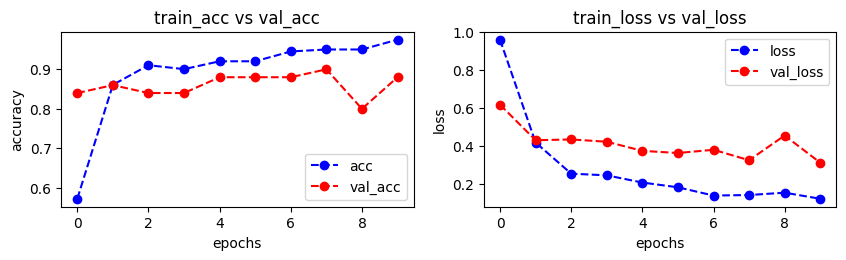

Optimizer: <keras.optimizers.legacy.gradient_descent.SGD object at 0x000001A7913F56D0>
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 5.2457 - accuracy: 0.4925 - val_loss: 2.8752 - val_accuracy: 0.5400
Epoch 2/10
7/7 [==============================] - 6s 863ms/step - loss: 0.9692 - accuracy: 0.7363 - val_loss: 0.3626 - val_accuracy: 0.8800
Epoch 3/10
7/7 [==============================] - 6s 895ms/step - loss: 0.1781 - accuracy: 0.9303 - val_loss: 0.2828 - val_accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 6s 891ms/step - loss: 0.8101 - accuracy: 0.7960 - val_loss: 0.3397 - val_accuracy: 0.9200
Epoch 5/10
7/7 [==============================] - 6s 916ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.3033 - val_accuracy: 0.8800
Epoch 6/10
7/7 [==============================] - 6s 868ms/step - loss: 0.0831 - accuracy: 0.9801 - val_loss: 0.3674 - val_accuracy: 0.8400
Epoch 7/10
7/7 [==============================] - 6s 844ms/step - loss: 0.0692 - accuracy: 0.9851 - val_loss: 0.3601 - val_accuracy: 0.8800
Epoc

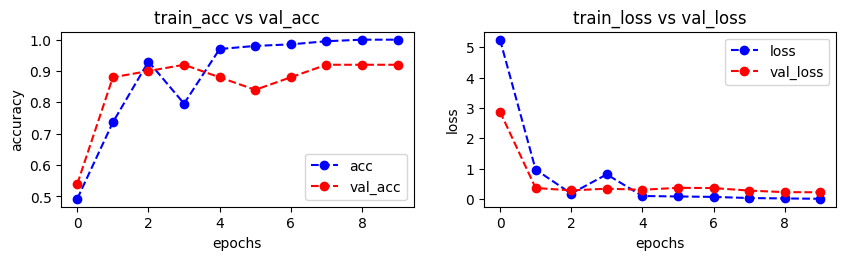

Optimizer: <keras.optimizers.legacy.nadam.Nadam object at 0x000001A78F28BD90>
------------------------//------------------------//------------------------





In [14]:
# Learning rates and Momentums are defined as default

optimizers = [Adam(lr=0.001),                                             
                SGD(lr=0.001, momentum=0.9, nesterov=True),                       # This is NAG, just simply changing a paramenter of SGD                                              
                Nadam(lr=0.001)
                ]
for i in optimizers:
        Base_CNN_Model = base_cnn(act_1='relu',                                     # Best Act. Function by previous tests
                                n_filt_1=6,                                         # Best Nº of Convolutional filters by previous tests
                                n_filt_2=128,                                       # Best Nº of Convolutional filters by previous tests
                                act_2='softmax',                                    # Best Act. Function by previous tests
                                kernel_size=(3,3),                                  # Best Kernel size by previous tests   
                                pool_size=(2,2),                                    # Best MaxPooling size by previous tests
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim=i,
                                loss_lambda='sparse_categorical_crossentropy',
                                metric='accuracy',
                                epoch=10,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Optimizer:", i)
        print('------------------------//------------------------//------------------------')
        print("\n\n")


__Conclusion__

* Lets analyse each optimizer in the list 

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128
* Activation function : 'relu' 

>__Adam__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9000

* Accuracy on Test: 0.9545


>__NAG__

* Accuracy on Train: 0.9751

* Accuracy on Validation: 0.8800

* Accuracy on Test: 0.8333


>__Nadam__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9200

* Accuracy on Test: 0.9091



The best Scores were Adam and Nadam, but Adam is better, although the further tests will be performend on both

***
### <font color='white'> __3.8 Learning Rates__ </font> <a class="anchor" id="threeeight"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

*_In some cases Learning Rates change the performance of Optimizers, will be tested with higher learning rates, from 0.001 to 0.01

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 2.2705 - accuracy: 0.3731 - val_loss: 1.3633 - val_accuracy: 0.4800
Epoch 2/10
7/7 [==============================] - 6s 872ms/step - loss: 0.8057 - accuracy: 0.6219 - val_loss: 1.0965 - val_accuracy: 0.6200
Epoch 3/10
7/7 [==============================] - 7s 919ms/step - loss: 0.4801 - accuracy: 0.8060 - val_loss: 0.6597 - val_accuracy: 0.8000
Epoch 4/10
7/7 [==============================] - 6s 860ms/step - loss: 0.4741 - accuracy: 0.8507 - val_loss: 0.4659 - val_accuracy: 0.8200
Epoch 5/10
7/7 [==============================] - 6s 885ms/step - loss: 0.2526 - accuracy: 0.9005 - val_loss: 0.4892 - val_accuracy: 0.8400
Epoch 6/10
7/7 [==============================] - 6s 857ms/step - loss: 0.1959 - accuracy: 0.9204 - val_loss: 0.3906 - val_accuracy: 0.8800
Epoch 7/10
7/7 [==============================] - 6s 870ms/step - loss: 0.1577 - accuracy: 0.9303 - val_loss: 0.3334 - val_accuracy: 0.9000
Epoc

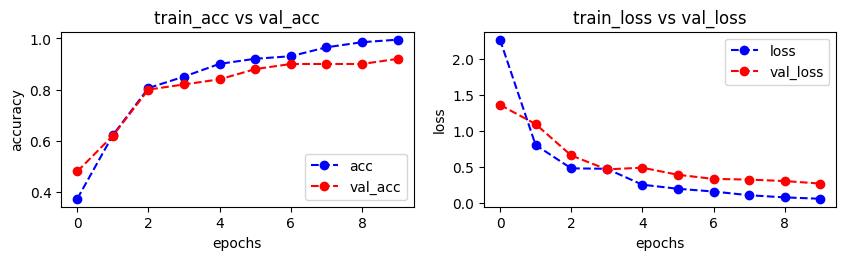

Optimizer: <keras.optimizers.legacy.adam.Adam object at 0x000001A7913D12D0>
Learning Rate: 0.0003
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 1.8765 - accuracy: 0.5274 - val_loss: 0.8034 - val_accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 6s 1s/step - loss: 0.6813 - accuracy: 0.7463 - val_loss: 0.4762 - val_accuracy: 0.9000
Epoch 3/10
7/7 [==============================] - 6s 1000ms/step - loss: 0.3245 - accuracy: 0.8856 - val_loss: 0.4717 - val_accuracy: 0.7800
Epoch 4/10
7/7 [==============================] - 6s 856ms/step - loss: 0.3189 - accuracy: 0.8806 - val_loss: 0.3381 - val_accuracy: 0.8800
Epoch 5/10
7/7 [==============================] - 6s 865ms/step - loss: 0.2181 - accuracy: 0.9204 - val_loss: 0.4752 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 7s 936ms/step - loss: 0.1698 - accuracy: 0.9353 - val_loss: 0.2795 - val_accuracy: 0.9000
Epoch 7/10
7/7 [==============================] - 7s 901ms/step - loss: 0.1030 - accuracy: 0.9751 - val_loss: 0.2694 - val_accuracy: 0.9000
Epoch 

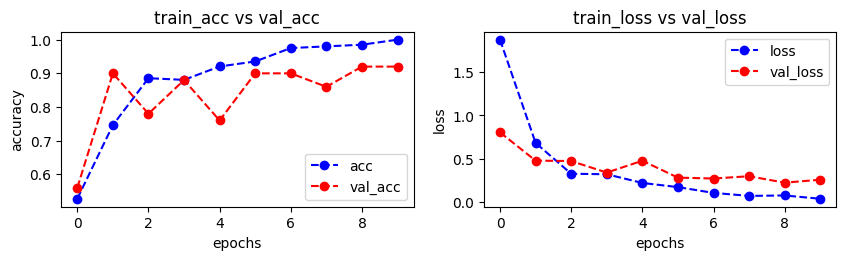

Optimizer: <keras.optimizers.legacy.nadam.Nadam object at 0x000001A78F352FD0>
Learning Rate: 0.0003
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 911ms/step - loss: 18.9663 - accuracy: 0.4527 - val_loss: 1.0326 - val_accuracy: 0.3000
Epoch 2/10
7/7 [==============================] - 6s 919ms/step - loss: 0.8203 - accuracy: 0.5771 - val_loss: 1.0303 - val_accuracy: 0.6200
Epoch 3/10
7/7 [==============================] - 6s 817ms/step - loss: 0.5280 - accuracy: 0.8060 - val_loss: 0.7091 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 7s 956ms/step - loss: 0.3524 - accuracy: 0.8408 - val_loss: 0.7394 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 6s 916ms/step - loss: 0.2382 - accuracy: 0.9154 - val_loss: 0.7548 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 7s 937ms/step - loss: 0.1168 - accuracy: 0.9453 - val_loss: 0.5471 - val_accuracy: 0.8200
Epoch 7/10
7/7 [==============================] - 6s 859ms/step - loss: 0.0906 - accuracy: 0.9652 - val_loss: 0.6345 - val_accuracy: 0.8000


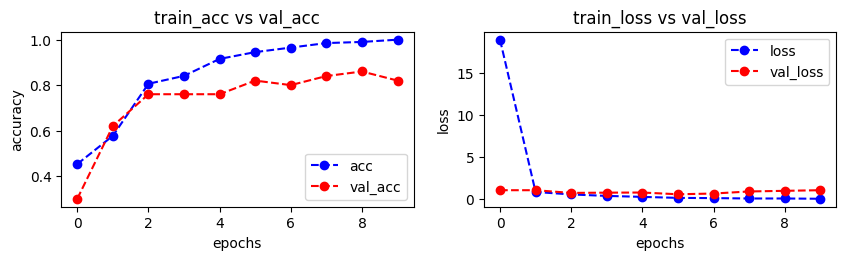

Optimizer: <keras.optimizers.legacy.adam.Adam object at 0x000001A78CEB0650>
Learning Rate: 0.01
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 964ms/step - loss: 72.8153 - accuracy: 0.3532 - val_loss: 3.0599 - val_accuracy: 0.6400
Epoch 2/10
7/7 [==============================] - 6s 876ms/step - loss: 0.8252 - accuracy: 0.8607 - val_loss: 2.0310 - val_accuracy: 0.4400
Epoch 3/10
7/7 [==============================] - 6s 923ms/step - loss: 3.2546 - accuracy: 0.6318 - val_loss: 0.7220 - val_accuracy: 0.7400
Epoch 4/10
7/7 [==============================] - 6s 842ms/step - loss: 1.8258 - accuracy: 0.7910 - val_loss: 0.6552 - val_accuracy: 0.8200
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.1894 - accuracy: 0.9254 - val_loss: 0.5842 - val_accuracy: 0.8200
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 0.0803 - accuracy: 0.9801 - val_loss: 0.5430 - val_accuracy: 0.8800
Epoch 7/10
7/7 [==============================] - 7s 954ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.5419 - val_accuracy: 0.8800
Epoch 

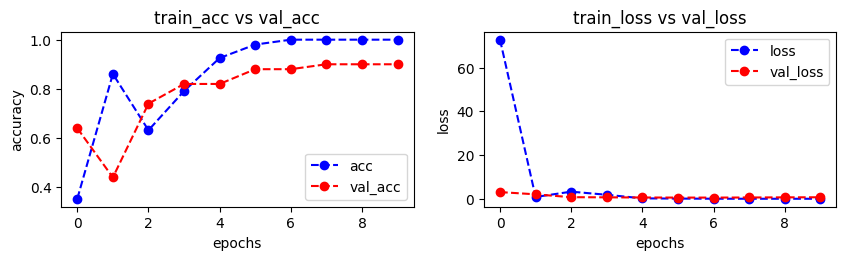

Optimizer: <keras.optimizers.legacy.nadam.Nadam object at 0x000001A7962A2D10>
Learning Rate: 0.01
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 6080.5151 - accuracy: 0.3781 - val_loss: 147.1525 - val_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 6s 994ms/step - loss: 17.3512 - accuracy: 0.4478 - val_loss: 1.0745 - val_accuracy: 0.4400
Epoch 3/10
7/7 [==============================] - 6s 874ms/step - loss: 1.0748 - accuracy: 0.4428 - val_loss: 1.0759 - val_accuracy: 0.4400
Epoch 4/10
7/7 [==============================] - 6s 935ms/step - loss: 1.0741 - accuracy: 0.4428 - val_loss: 1.0753 - val_accuracy: 0.4400
Epoch 5/10
7/7 [==============================] - 6s 877ms/step - loss: 1.0767 - accuracy: 0.4428 - val_loss: 1.0755 - val_accuracy: 0.4400
Epoch 6/10
7/7 [==============================] - 6s 801ms/step - loss: 1.0750 - accuracy: 0.4428 - val_loss: 1.0749 - val_accuracy: 0.4400
Epoch 7/10
7/7 [==============================] - 6s 929ms/step - loss: 1.0763 - accuracy: 0.4428 - val_loss: 1.0753 - val_accuracy: 0.440

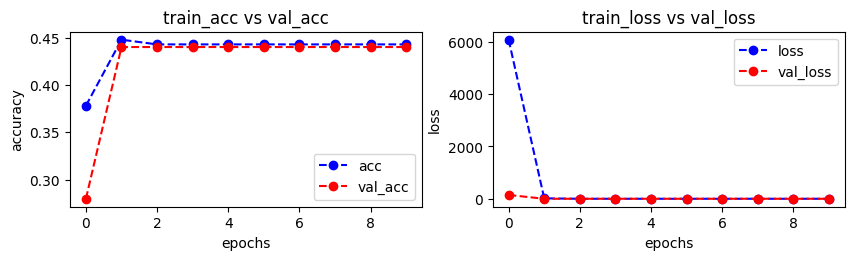

Optimizer: <keras.optimizers.legacy.adam.Adam object at 0x000001A7978D5590>
Learning Rate: 0.1
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 6s 865ms/step - loss: 1435.6533 - accuracy: 0.3582 - val_loss: 123.2511 - val_accuracy: 0.4400
Epoch 2/10
7/7 [==============================] - 5s 759ms/step - loss: 29.5689 - accuracy: 0.4328 - val_loss: 1.0730 - val_accuracy: 0.4400
Epoch 3/10
7/7 [==============================] - 5s 779ms/step - loss: 1.0859 - accuracy: 0.4080 - val_loss: 1.0762 - val_accuracy: 0.4400
Epoch 4/10
7/7 [==============================] - 5s 758ms/step - loss: 1.0766 - accuracy: 0.4428 - val_loss: 1.0756 - val_accuracy: 0.4400
Epoch 5/10
7/7 [==============================] - 6s 887ms/step - loss: 1.0745 - accuracy: 0.4428 - val_loss: 1.0742 - val_accuracy: 0.4400
Epoch 6/10
7/7 [==============================] - 6s 832ms/step - loss: 1.0742 - accuracy: 0.4428 - val_loss: 1.0743 - val_accuracy: 0.4400
Epoch 7/10
7/7 [==============================] - 6s 844ms/step - loss: 1.0763 - accuracy: 0.4428 - val_loss: 1.0746 - val_accuracy: 0.

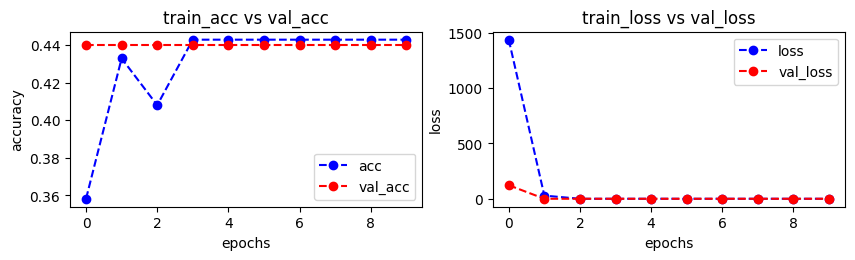

Optimizer: <keras.optimizers.legacy.nadam.Nadam object at 0x000001A7995D0910>
Learning Rate: 0.1
------------------------//------------------------//------------------------





In [15]:
# Learning rates and Momentums are defined as default
learning_rates = [3e-4,.01,.1]

for i in learning_rates:
    optimizers = [Adam(lr=i),                                                                                           
                Nadam(lr=i)]
    for j in optimizers:
        Base_CNN_Model = base_cnn(act_1='relu',                                     # Best Act. Function by previous tests
                                n_filt_1=6,                                         # Best Nº of Convolutional filters by previous tests
                                n_filt_2=128,                                       # Best Nº of Convolutional filters by previous tests
                                act_2='softmax',                                    # Best Act. Function by previous tests
                                kernel_size=(3,3),                                  # Best Kernel size by previous tests   
                                pool_size=(2,2),                                    # Best MaxPooling size by previous tests
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim=j,
                                loss_lambda='sparse_categorical_crossentropy',
                                metric='accuracy',
                                epoch=10,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Optimizer:", j)
        print("Learning Rate:", i)
        print('------------------------//------------------------//------------------------')
        print("\n\n")


__Conclusion__

* Lets analyse each optimizer with the listed learning rates 

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128
* Activation function : 'relu' 
* Best Optimizers : Adam & Nadam


>__Adam__
>> __Learning Rate : 3e-4__

* Accuracy on Train: 0.9950

* Accuracy on Validation: 0.9200

* Accuracy on Test: 0.8788

>> __Learning Rate : .001__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9000

* Accuracy on Test: 0.9545

>> __Learning Rate : .01__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.8200

* Accuracy on Test: 0.8788

>> __Learning Rate : .1__

* Accuracy on Train: 0.4428

* Accuracy on Validation: 0.4400

* Accuracy on Test: 0.3939



>__Nadam__
>> __Learning Rate : 3e-4__

* Accuracy on Train:  1.0000

* Accuracy on Validation: 0.9800

* Accuracy on Test: 0.8798

>> __Learning Rate : .001__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9200

* Accuracy on Test: 0.9091

>> __Learning Rate : .01__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9000

* Accuracy on Test: 0.8939

>> __Learning Rate : .1__

* Accuracy on Train: 0.4428

* Accuracy on Validation: 0.4400

* Accuracy on Test: 0.3939


The best Scores were Adam, with learning rate of 0.001.

***
### <font color='white'> __3.9 Loss Function__ </font> <a class="anchor" id="threenine"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

A __loss function__ is a method of evaluating how well a algorithm model a dataset calculating the absolute difference between predictions and the actual value, resulting in values between 0 and 1. 

__Theoretically__:

* "0.00" - Perfect prediction
* "<0.02" - Great prediction
* "<0.05" - Good prediction
* "<0.20" - Medium prediction
* ">0.20" - Not good predction
* "1" - Bad predction
* ">1" - Loss function have an error

During a model creation, during changing pieces of the algorithm in order to improve the loss function will tell the direction of objective accomplishment. 

* __The most commonly used loss function in image classification is cross-entropy loss/log loss (binary for classification between 2 classes and sparse categorical for 3 or more).__

>> __CategoricalCrossentropy__

`categorical_crossentropy`

Computes the crossentropy loss between the labels and prediction, using it when exist two or more label classes, labels are expected to be received in a _one hot_ representation. Although is those labels are stored as integers is necessary to use __SparceCategoricalCrossentropy__
<Br>
<Br>

>> __SparceCategoricalCrossentropy__

`sparse_categorical_crossentropy`

Computes the crossentropy loss between the labels and prediction, using it when exist two or more label classes, labels are expected to be received as integers.
<Br>
<Br>

>> __Poisson__

`poisson`

Computes the Poisson loss between actual values and predicted values.
<Br>
<Br>

>> __KLDivergence__

`kl_divergence`

Computes the Kullback_Leibler divergence loss between actual and predicted values.
Kullback_Leibler divergence also knowen by __relative entropy__ and __i-divergence__ is a statistical distance, measure how one probability distribution "P" is different from the second "Q", interpreted as __expected excess surprise from using "Q" as a model when the actual distirbution is "P"__. 
<Br>
<Br>


__Conclusion__

After understanding the utility and use of this loss function can be concluded that for this type of classification the list of applicable functions are:

The Loss Functions in test will be:

* SparceCategoricalCrossentropy
* Poisson
* KLDivergence

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 11s 1s/step - loss: 7.4979 - accuracy: 0.3731 - val_loss: 4.1490 - val_accuracy: 0.4200
Epoch 2/10
7/7 [==============================] - 6s 1s/step - loss: 2.2114 - accuracy: 0.5174 - val_loss: 1.6688 - val_accuracy: 0.5600
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.7305 - accuracy: 0.7214 - val_loss: 0.4526 - val_accuracy: 0.8400
Epoch 4/10
7/7 [==============================] - 7s 991ms/step - loss: 0.2314 - accuracy: 0.9204 - val_loss: 0.3119 - val_accuracy: 0.8800
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.1698 - accuracy: 0.9453 - val_loss: 0.2761 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.1075 - accuracy: 0.9801 - val_loss: 0.2340 - val_accuracy: 0.9400
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 0.9200
Epoch 8/10
7/7 [==

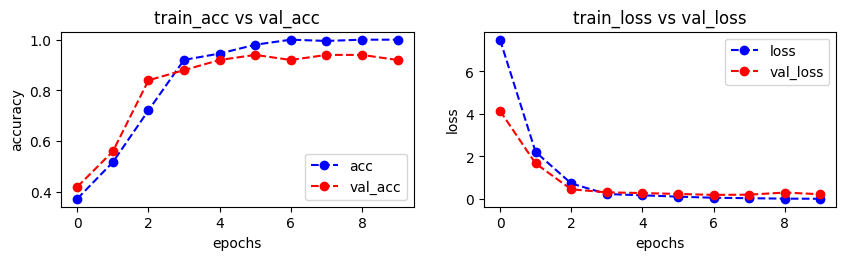

Loss Function: sparse_categorical_crossentropy
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 7.9262 - accuracy: 0.2388 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 9.3146 - accuracy: 0.2786 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 3/10
7/7 [==============================] - 7s 960ms/step - loss: 9.3146 - accuracy: 0.2786 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 4/10
7/7 [==============================] - 6s 916ms/step - loss: 9.3146 - accuracy: 0.2786 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 5/10
7/7 [==============================] - 7s 915ms/step - loss: 9.3146 - accuracy: 0.2786 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 6/10
7/7 [==============================] - 7s 965ms/step - loss: 9.3146 - accuracy: 0.2786 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 7/10
7/7 [==============================] - 7s 924ms/step - loss: 9.3146 - accuracy: 0.2786 - val_loss: 9.3595 - val_accuracy: 0.2800
Epoch 8

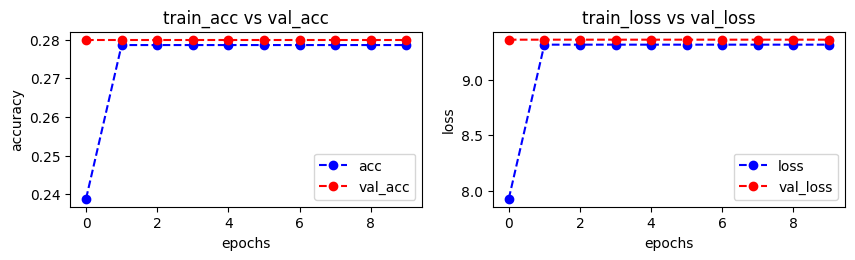

Loss Function: Poisson
------------------------//------------------------//------------------------



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 15.0902 - accuracy: 0.2736 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 17.9625 - accuracy: 0.2786 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 17.9625 - accuracy: 0.2786 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 17.9625 - accuracy: 0.2786 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 17.9625 - accuracy: 0.2786 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 17.9625 - accuracy: 0.2786 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 17.9625 - accuracy: 0.2786 - val_loss: 18.0523 - val_accuracy: 0.2800
Epoch 8/

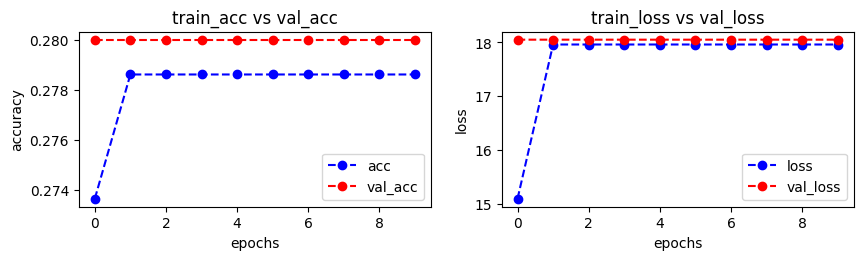

Loss Function: kl_divergence
------------------------//------------------------//------------------------





In [18]:
# Learning rates and Momentums are defined as default

losses = ['sparse_categorical_crossentropy',
        'Poisson',
        'kl_divergence'
                ]
for i in losses:
        Base_CNN_Model = base_cnn(act_1='relu',                                     # Best Act. Function by previous tests
                                n_filt_1=6,                                         # Best Nº of Convolutional filters by previous tests
                                n_filt_2=128,                                       # Best Nº of Convolutional filters by previous tests
                                act_2='softmax',                                    # Best Act. Function by previous tests
                                kernel_size=(3,3),                                  # Best Kernel size by previous tests   
                                pool_size=(2,2),                                    # Best MaxPooling size by previous tests
                                batch_norm=0,                                       # Excluded by previous tests
                                model_name = 'Base_CNN_Model', 
                                optim=Adam(lr=0.001),                               # Best Optimizer by previous tests
                                loss_lambda=i,
                                metric='accuracy',
                                epoch=10,
                                schema=1,       
                                scores=1,       
                                results=1,      
                                data_augmentation=0,                                # Excluded by previous tests
                                seed=0)
        
        print("Loss Function:", i)
        print('------------------------//------------------------//------------------------')
        print("\n\n")

__Conclusion__

* Lets analyse each optimizer with the listed learning rates 

Previous setting:
* Without Augmentation
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128
* Activation function : 'relu' 
* Best Optimizers : Adam & Nadam
* Best Optimizer after Learning Rates : Adam
* Best Loss Function : Sparce Categorical Crossentropy


>__Sparce Categorical Crossentropy__

* Accuracy on Train: 1.0000

* Accuracy on Validation: 0.9200

* Accuracy on Test: 0.9394

>__Poisson__

* Accuracy on Train: 0.2786

* Accuracy on Validation: 0.2800

* Accuracy on Test: 0.3030

>__KLDivergence__

* Accuracy on Train: 0.2786

* Accuracy on Validation: 0.2800

* Accuracy on Test: 0.3030

The most accurace loss function to measure this models performance is "Sparce Categorical Crossentropy", and so will be taken for next tests.

***
### <font color='white'> __3.10 Retest Batch Normalization__ </font> <a class="anchor" id="threeten"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 11s 1s/step - loss: 105.9184 - accuracy: 0.4328 - val_loss: 8.9073 - val_accuracy: 0.4400
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 28.1193 - accuracy: 0.7164 - val_loss: 2.6242 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 10s 2s/step - loss: 11.9442 - accuracy: 0.8806 - val_loss: 2.7974 - val_accuracy: 0.6200
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 5.0562 - accuracy: 0.9353 - val_loss: 3.1784 - val_accuracy: 0.6600
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 4.4788 - accuracy: 0.9104 - val_loss: 1.6588 - val_accuracy: 0.7400
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 3.3440 - accuracy: 0.9502 - val_loss: 0.9557 - val_accuracy: 0.8600
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 1.6291 - accuracy: 0.9502 - val_loss: 1.3341 - val_accuracy: 0.8600
Epoch 8/10
7/7 [

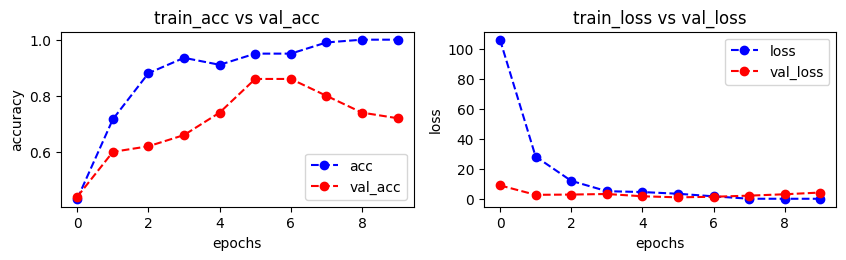

------------------------//------------------------//------------------------





In [5]:
# Learning rates and Momentums are defined as default
Final_Model = base_cnn(act_1='relu',                                        # Best Act. Function by previous tests
                        n_filt_1=6,                                         # Best Nº of Convolutional filters by previous tests
                        n_filt_2=128,                                       # Best Nº of Convolutional filters by previous tests
                        act_2='softmax',                                    # Best Act. Function by previous tests
                        kernel_size=(3,3),                                  # Best Kernel size by previous tests   
                        pool_size=(2,2),                                    # Best MaxPooling size by previous tests
                        batch_norm=1,                                       # RETESTING!
                        model_name = 'Final_Model', 
                        optim=Adam(lr=0.001),                               # Best Optimizer by previous tests
                        loss_lambda='sparse_categorical_crossentropy',      # Best Loss Function by previous tests
                        metric='accuracy',
                        epoch=10,
                        schema=1,       
                        scores=1,       
                        results=1,      
                        data_augmentation=0,                                # Excluded by previous tests
                        seed=0)

print('------------------------//------------------------//------------------------')
print("\n\n")

__Conclusion__

* Lets analyse each optimizer with the listed learning rates 

Previous setting:
* Without Augmentarion
* Without Batch Normalization
* Convolutional filters are 1º = 6 and 2º = 128
* Activation function : 'relu' 
* Best Optimizers : Adam & Nadam
* Best Optimizer after Learning Rates : Adam
* Best Loss Function : Sparce Categorical Crossentropy

Even with the model will constructed batch normalization is not performing.

***
## <font color='white'> __4 Final Model Train__ </font> <a class="anchor" id="four"></a>

[<font color='mediumpurple'>Back to Index </font>](#index)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


None



Training model:

Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 6.0141 - accuracy: 0.4030 - val_loss: 4.6232 - val_accuracy: 0.4400
Epoch 2/10
7/7 [==============================] - 6s 872ms/step - loss: 1.6113 - accuracy: 0.6816 - val_loss: 0.8781 - val_accuracy: 0.7200
Epoch 3/10
7/7 [==============================] - 6s 966ms/step - loss: 0.4648 - accuracy: 0.7960 - val_loss: 0.7384 - val_accuracy: 0.7800
Epoch 4/10
7/7 [==============================] - 6s 932ms/step - loss: 0.2685 - accuracy: 0.8657 - val_loss: 0.3916 - val_accuracy: 0.8800
Epoch 5/10
7/7 [==============================] - 6s 865ms/step - loss: 0.1706 - accuracy: 0.9453 - val_loss: 0.3376 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 6s 884ms/step - loss: 0.1157 - accuracy: 0.9701 - val_loss: 0.3571 - val_accuracy: 0.9000
Epoch 7/10
7/7 [==============================] - 6s 872ms/step - loss: 0.0782 - accuracy: 0.9652 - val_loss: 0.3160 - val_accuracy: 0.9200
Epoc

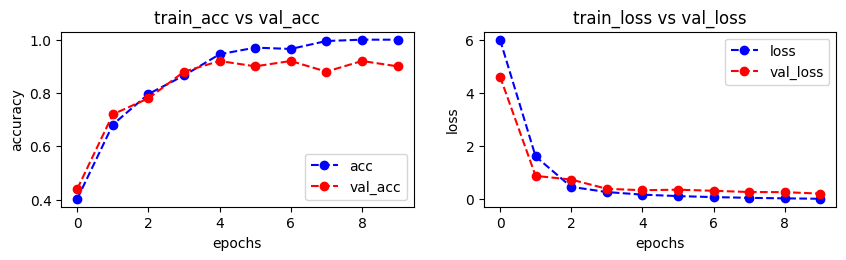

------------------------//------------------------//------------------------





In [7]:
# Learning rates and Momentums are defined as default
Final_Model = base_cnn(act_1='relu',                                        # Best Act. Function by previous tests
                        n_filt_1=6,                                         # Best Nº of Convolutional filters by previous tests
                        n_filt_2=128,                                       # Best Nº of Convolutional filters by previous tests
                        act_2='softmax',                                    # Best Act. Function by previous tests
                        kernel_size=(3,3),                                  # Best Kernel size by previous tests   
                        pool_size=(2,2),                                    # Best MaxPooling size by previous tests
                        batch_norm=0,                                       # Excluded by previous tests
                        model_name = 'Final_Model', 
                        optim=Adam(lr=0.001),                               # Best Optimizer by previous tests
                        loss_lambda='sparse_categorical_crossentropy',      # Best Loss Function by previous tests
                        metric='accuracy',
                        epoch=10,
                        schema=1,       
                        scores=1,       
                        results=1,      
                        data_augmentation=0,                                # Excluded by previous tests
                        seed=0)

print('------------------------//------------------------//------------------------')
print("\n\n")